**Import the packages**

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [1154]:
df_received = pd.read_csv('Received_Payments_Data.csv')
df_open_invoice = pd.read_csv('Open_Invoice_data.csv', encoding='windows-1252')

In [3]:
df_received.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,1.421000e+10,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [55]:
# we will first focus on the Received_Payments_Data

**Data understanding**

In [57]:
df_received.shape

(93937, 14)

In [11]:
df_received.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RECEIPT_METHOD         93937 non-null  object 
 1   CUSTOMER_NAME          93937 non-null  object 
 2   CUSTOMER_NUMBER        93937 non-null  int64  
 3   RECEIPT_DOC_NO         93908 non-null  float64
 4   RECEIPT_DATE           93937 non-null  object 
 5   CLASS                  93937 non-null  object 
 6   CURRENCY_CODE          93937 non-null  object 
 7   Local Amount           93937 non-null  float64
 8   USD Amount             93937 non-null  float64
 9   INVOICE_ALLOCATED      93937 non-null  object 
 10  INVOICE_CREATION_DATE  93937 non-null  object 
 11  DUE_DATE               93937 non-null  object 
 12  PAYMENT_TERM           93937 non-null  object 
 13  INVOICE_CLASS          93937 non-null  object 
 14  INVOICE_CURRENCY_CODE  93937 non-null  object 
 15  IN

**convert the datetime columns to datetime**

In [19]:
df_received['RECEIPT_DATE'] = pd.to_datetime(df_received['RECEIPT_DATE'])
df_received['DUE_DATE'] = pd.to_datetime(df_received['DUE_DATE'])
df_received['INVOICE_CREATION_DATE'] = pd.to_datetime(df_received['INVOICE_CREATION_DATE'])

In [59]:
df_received[['RECEIPT_DATE', 'DUE_DATE', 'INVOICE_CREATION_DATE']].head()

,RECEIPT_DATE,DUE_DATE,INVOICE_CREATION_DATE
0,2021-04-20,2020-12-30,2020-11-02
1,2021-01-31,2021-01-28,2020-12-29
2,2021-01-31,2021-03-01,2021-01-30
3,2021-01-31,2021-01-14,2020-12-15
4,2021-01-31,2021-01-14,2020-12-15


In [23]:
df_received.isnull().sum()

RECEIPT_METHOD            0
CUSTOMER_NAME             0
CUSTOMER_NUMBER           0
RECEIPT_DOC_NO           29
RECEIPT_DATE              0
CLASS                     0
CURRENCY_CODE             0
Local Amount              0
USD Amount                0
INVOICE_ALLOCATED         0
INVOICE_CREATION_DATE     0
DUE_DATE                  0
PAYMENT_TERM              0
INVOICE_CLASS             0
INVOICE_CURRENCY_CODE     0
INVOICE_TYPE              0
dtype: int64

In [27]:
#Receipt document number has 29 null values. It is Reference number of the payment receipt and can be dropped

df_received.drop(['RECEIPT_DOC_NO'], axis = 1, inplace = True)


In [31]:
df_received.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         93937 non-null  object        
 1   CUSTOMER_NAME          93937 non-null  object        
 2   CUSTOMER_NUMBER        93937 non-null  int64         
 3   RECEIPT_DATE           93937 non-null  datetime64[ns]
 4   CLASS                  93937 non-null  object        
 5   CURRENCY_CODE          93937 non-null  object        
 6   Local Amount           93937 non-null  float64       
 7   USD Amount             93937 non-null  float64       
 8   INVOICE_ALLOCATED      93937 non-null  object        
 9   INVOICE_CREATION_DATE  93937 non-null  datetime64[ns]
 10  DUE_DATE               93937 non-null  datetime64[ns]
 11  PAYMENT_TERM           93937 non-null  object        
 12  INVOICE_CLASS          93937 non-null  object        
 13  I

**check for any records where invoice value is less than 0**

In [44]:
df_received[df_received['USD Amount'] < 0] ## no records where invoice value is less than 0

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE


In [46]:
df_received[df_received['Local Amount'] < 0] ## no records where invoice value is less than 0

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE


In [ ]:
# Perform a quick sanity check on the data

In [35]:
df_received['CLASS'].value_counts()

CLASS
PMT    93937
Name: count, dtype: int64

In [ ]:
#Class refers to payments that have already been received. This column can be dropped

In [37]:
df_received.drop(['CLASS'], axis = 1, inplace = True)

In [39]:
df_received['RECEIPT_METHOD'].value_counts()

RECEIPT_METHOD
WIRE             84407
AP/AR Netting     4847
CHEQUE            3472
CASH               782
I/C WIRE           211
PDC                210
I/C Check            6
I/C CASH             2
Name: count, dtype: int64

In [ ]:
# Since there are multiple similar methods for receipts, we can combine them into one to maintain consistency 

In [47]:
df_received['RECEIPT_METHOD'] = df_received['RECEIPT_METHOD'].replace('I/C WIRE', 'WIRE')
df_received['RECEIPT_METHOD'] = df_received['RECEIPT_METHOD'].replace('I/C Check', 'CHEQUE')
df_received['RECEIPT_METHOD'] = df_received['RECEIPT_METHOD'].replace('I/C CASH', 'CASH')

<Axes: xlabel='RECEIPT_METHOD'>

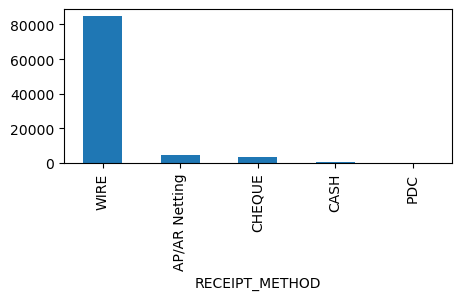

In [53]:
df_received['RECEIPT_METHOD'].value_counts().plot.bar(figsize = (5,2))

In [61]:
df_received['CUSTOMER_NAME'].value_counts()

CUSTOMER_NAME
SEPH Corp    23143
FARO Corp    15004
PARF Corp     6624
ALLI Corp     5645
AREE Corp     2224
             ...  
KHAW Corp        1
EYEW Corp        1
BRAV Corp        1
NOUS Corp        1
ESSE Corp        1
Name: count, Length: 690, dtype: int64

In [63]:
df_received['CUSTOMER_NUMBER'].value_counts()

CUSTOMER_NUMBER
1409     14698
15768    11052
2315      9716
7530      5382
1888      5062
         ...  
34989        1
35032        1
51402        1
34956        1
2195         1
Name: count, Length: 1054, dtype: int64

In [ ]:
# Bases on the above, it appears that one customer may have multiple customer codes

In [65]:
df_received['CUSTOMER_NUMBER'].nunique()

1054

In [67]:
df_received['CUSTOMER_NAME'].nunique()

690

In [75]:
df_received.groupby('CUSTOMER_NAME')['CUSTOMER_NUMBER'].value_counts(ascending=True)

CUSTOMER_NAME  CUSTOMER_NUMBER
3D D Corp      4009               172
6TH  Corp      51440                9
A3 D Corp      23356                5
ABC  Corp      20965                3
ABDU Corp      34219                1
                                 ... 
ZAHR Corp      35012               13
ZAIN Corp      48682               20
               35013               22
ZERO Corp      44781                4
ZV F Corp      42660               11
Name: count, Length: 1054, dtype: int64

In [77]:
df_received.groupby(['CUSTOMER_NAME','CUSTOMER_NUMBER']).count()

RECEIPT_METHOD  RECEIPT_DATE  CURRENCY_CODE  \
CUSTOMER_NAME CUSTOMER_NUMBER                                                
3D D Corp     4009                        172           172            172   
6TH  Corp     51440                         9             9              9   
A3 D Corp     23356                         5             5              5   
ABC  Corp     20965                         3             3              3   
ABDU Corp     34219                         1             1              1   
...                                       ...           ...            ...   
ZAHR Corp     45445                         1             1              1   
ZAIN Corp     35013                        22            22             22   
              48682                        20            20             20   
ZERO Corp     44781                         4             4              4   
ZV F Corp     42660                        11            11             11   

                               Local Amount  USD Amount  INVOICE_ALLOCATED  \
CUSTOMER_NAME CUSTOMER_NUMBER                                                
3D D Corp     4009                      172         172                172   
6TH  Corp     51440                       9           9                  9   
A3 D Corp     23356                       5           5                  5   
ABC  Corp     20965                       3           3                  3   
ABDU Corp     34219                       1           1                  1   
...                                     ...         ...                ...   
ZAHR Corp     45445                       1           1                  1   
ZAIN Corp     35013                      22          22                 22   
              48682                      20          20                 20   
ZERO Corp     44781                       4           4                  4   
ZV F Corp     42660                      11          11                 11   

                               INVOICE_CREATION_DATE  DUE_DATE  PAYMENT_TERM  \
CUSTOMER_NAME CUSTOMER_NUMBER                                                  
3D D Corp     4009                               172       172           172   
6TH  Corp     51440                                9         9             9   
A3 D Corp     23356                                5         5             5   
ABC  Corp     20965                                3         3             3   
ABDU Corp     34219                                1         1             1   
...                                              ...       ...           ...   
ZAHR Corp     45445                                1         1             1   
ZAIN Corp     35013                               22        22            22   
              48682                               20        20            20   
ZERO Corp     44781                                4         4             4   
ZV F Corp     42660                               11        11            11   

                               INVOICE_CLASS  INVOICE_CURRENCY_CODE  \
CUSTOMER_NAME CUSTOMER_NUMBER                                         
3D D Corp     4009                       172                    172   
6TH  Corp     51440                        9                      9   
A3 D Corp     23356                        5                      5   
ABC  Corp     20965                        3                      3   
ABDU Corp     34219                        1                      1   
...                                      ...                    ...   
ZAHR Corp     45445                        1                      1   
ZAIN Corp     35013                       22                     22   
              48682                       20                     20   
ZERO Corp     44781                        4                      4   
ZV F Corp     42660                       11                     11   

                               INVOI

In [79]:
df_received['INVOICE_CLASS'].value_counts()

INVOICE_CLASS
INV    88124
CM      5261
DM       552
Name: count, dtype: int64

In [81]:
df_received['CURRENCY_CODE'].value_counts()

CURRENCY_CODE
SAR    36495
AED    36279
USD    19524
EUR     1438
GBP      130
BHD       59
KWD       10
QAR        2
Name: count, dtype: int64

In [87]:
#there are two features with amount. Let us check them

In [83]:
df_received['USD Amount'].describe()

count    9.393700e+04
mean     5.312013e+05
std      9.508693e+05
min      0.000000e+00
25%      3.766298e+04
50%      1.810010e+05
75%      5.996137e+05
max      1.084983e+07
Name: USD Amount, dtype: float64

In [85]:
df_received['Local Amount'].describe()

count    9.393700e+04
mean     1.066470e+06
std      1.546901e+06
min      0.000000e+00
25%      8.198039e+04
50%      4.053438e+05
75%      1.425606e+06
max      1.084983e+07
Name: Local Amount, dtype: float64

In [ ]:
# The max invoice value for both local and USD amount appears to be the same. This seems to be an anamoly.Lets check this in detail 

In [91]:
df_received['Local Amount'].max(), df_received['USD Amount'].max()

(10849828.8, 10849828.8)

In [93]:
df_received[df_received['USD Amount'] == df_received['Local Amount']]

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
48,WIRE,ALLI Corp,7530,2021-01-13,AED,6448.74,6448.74,1.002E+11,2020-12-23,2021-01-30,30 Days from EOM,INV,AED,Non Goods
49,WIRE,ALLI Corp,7530,2021-01-13,AED,6448.74,6448.74,1.002E+11,2020-12-23,2021-01-30,30 Days from EOM,INV,AED,Non Goods
50,WIRE,ALLI Corp,7530,2021-01-13,AED,6448.74,6448.74,1.002E+11,2020-12-23,2021-01-30,30 Days from EOM,INV,AED,Non Goods
51,WIRE,ALLI Corp,7530,2021-01-13,AED,6448.74,6448.74,1.002E+11,2020-12-23,2021-01-30,30 Days from EOM,INV,AED,Non Goods
52,WIRE,MAC Corp,1385,2021-01-19,AED,49005.48,49005.48,1.0019E+11,2019-09-26,2019-10-26,30 Days from Inv Date,INV,USD,Non Goods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93932,WIRE,PEAR Corp,21144,2021-04-01,USD,59914.50,59914.50,2.842E+11,2020-12-28,2020-12-28,Immediate,CM,USD,Goods
93933,WIRE,PEAR Corp,21144,2021-04-01,USD,59914.50,59914.50,2.842E+11,2020-12-28,2020-12-28,Immediate,CM,USD,Goods
93934,WIRE,PEAR Corp,21144,2021-04-01,USD,59914.50,59914.50,2.842E+11,2020-12-28,2020-12-28,Immediate,CM,USD,Goods
93935,WIRE,NAMS Corp,21145,2021-04-01,AED,23574.33,23574.33,2.842E+11,2021-01-24,2021-03-24,60 Days from Inv Date,INV,AED,Goods


In [ ]:
# As you can see above there are multilpe instances where USD amount and local amount match. We will use USD amount and drop local amount

In [95]:
df_received.drop('Local Amount', axis = 1, inplace = True)

In [97]:
df_received.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         93937 non-null  object        
 1   CUSTOMER_NAME          93937 non-null  object        
 2   CUSTOMER_NUMBER        93937 non-null  int64         
 3   RECEIPT_DATE           93937 non-null  datetime64[ns]
 4   CURRENCY_CODE          93937 non-null  object        
 5   USD Amount             93937 non-null  float64       
 6   INVOICE_ALLOCATED      93937 non-null  object        
 7   INVOICE_CREATION_DATE  93937 non-null  datetime64[ns]
 8   DUE_DATE               93937 non-null  datetime64[ns]
 9   PAYMENT_TERM           93937 non-null  object        
 10  INVOICE_CLASS          93937 non-null  object        
 11  INVOICE_CURRENCY_CODE  93937 non-null  object        
 12  INVOICE_TYPE           93937 non-null  object        
dtypes

In [101]:
# It also shows the miminuum amount as 0. let us check it
df_received['USD Amount'].min()

0.0

In [103]:
df_received[df_received['USD Amount'] == 0]

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
1091,WIRE,AL F Corp,23618,2021-01-31,SAR,0.0,1.0119E+11,2019-05-15,2019-06-15,15 Days from EOM,INV,SAR,Goods
1092,WIRE,AL F Corp,23618,2021-01-31,SAR,0.0,1.0119E+11,2019-08-06,2019-09-15,15 Days from EOM,INV,SAR,Goods
1093,WIRE,AL F Corp,23618,2021-01-31,SAR,0.0,1.0119E+11,2019-12-19,2020-01-15,15 Days from EOM,INV,SAR,Goods
1094,WIRE,AL F Corp,23618,2021-01-31,SAR,0.0,11705,2021-01-24,2021-02-15,15 Days from EOM,INV,SAR,Non Goods
1095,WIRE,AL F Corp,23618,2021-01-31,SAR,0.0,1.0118E+11,2018-08-15,2018-09-15,15 Days from EOM,INV,SAR,Goods
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93879,WIRE,SAUD Corp,38035,2021-05-31,SAR,0.0,2000006359,2020-06-28,2017-08-29,30 Days from Inv Date,INV,SAR,Non Goods
93880,WIRE,SAUD Corp,38035,2021-05-31,SAR,0.0,2000006467,2020-06-28,2017-08-31,30 Days from Inv Date,INV,SAR,Non Goods
93881,WIRE,SAUD Corp,38035,2021-05-31,SAR,0.0,2000006765,2020-06-28,2017-09-06,30 Days from Inv Date,INV,SAR,Non Goods
93882,WIRE,SAUD Corp,38035,2021-05-31,SAR,0.0,2000006917,2020-06-28,2017-09-09,30 Days from Inv Date,INV,SAR,Non Goods


In [ ]:
# Since we are dealing with data related to payments received, we will drop the records where the invoice value is less than 0. 

In [109]:
df_received = df_received[df_received['USD Amount'] > 0]

In [111]:
df_received.shape

(92811, 13)

<Axes: xlabel='INVOICE_TYPE'>

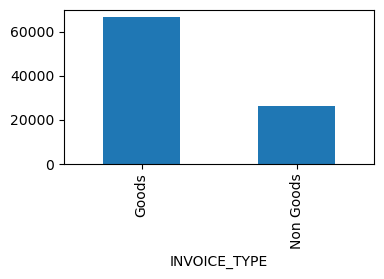

In [121]:
df_received['INVOICE_TYPE'].value_counts().plot.bar(figsize = (4,2))

**derive target value by checking whether the payment receipt date falls before or after the due date**

In [123]:
df_received['delayed_payment'] = df_received.apply(lambda x: 0 if x['RECEIPT_DATE'] < x['DUE_DATE'] else 1, axis=1)

In [124]:
df_received.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,delayed_payment
0,WIRE,C EA Corp,37403,2021-04-20,USD,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1
1,WIRE,RADW Corp,4003,2021-01-31,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1
2,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0
3,WIRE,FARO Corp,1409,2021-01-31,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1
4,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1


**Derive Payments Terms feature based on the difference between the Due Date and the Invoice Creation Date so that it gives you a numerical variable**

In [141]:
df_received['Time_to_payment'] = df_received.apply(lambda x: x['DUE_DATE'] - x['INVOICE_CREATION_DATE'], axis=1)

In [143]:
df_received['Time_to_payment'] = df_received['Time_to_payment'].dt.days

In [149]:
df_received.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,delayed_payment,Time_to_payment
0,WIRE,C EA Corp,37403,2021-04-20,USD,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1,58
1,WIRE,RADW Corp,4003,2021-01-31,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1,30
2,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0,30
3,WIRE,FARO Corp,1409,2021-01-31,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,30
4,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,30


In [151]:
df_received.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CURRENCY_CODE', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'PAYMENT_TERM', 'INVOICE_CLASS',
       'INVOICE_CURRENCY_CODE', 'INVOICE_TYPE', 'delayed_payment',
       'Time_to_payment'],
      dtype='object')

In [135]:
df_received.CUSTOMER_NAME.nunique()

690

In [153]:
df_received['payment_made_time'] = df_received.apply(lambda x: x['DUE_DATE'] - x['RECEIPT_DATE'], axis=1)

In [157]:
df_received['payment_made_time'] = df_received['payment_made_time'].dt.days

In [159]:
df_received.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,delayed_payment,Time_to_payment,payment_made_time
0,WIRE,C EA Corp,37403,2021-04-20,USD,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1,58,-111
1,WIRE,RADW Corp,4003,2021-01-31,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1,30,-3
2,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0,30,29
3,WIRE,FARO Corp,1409,2021-01-31,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,30,-17
4,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,30,-17


**EDA - Let us now get initial understanding on the data**

In [ ]:
# Plot the USD amount in a box plot to see how it is ditributed

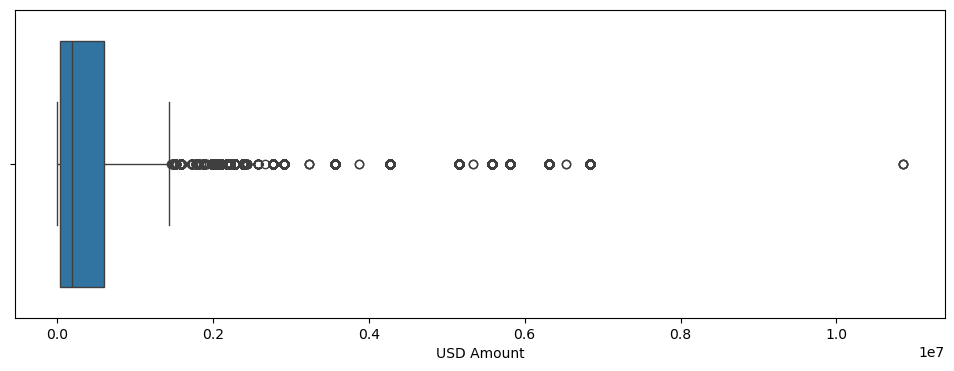

In [174]:
plt.figure(figsize = (12,4))
sns.boxplot(x = df_received['USD Amount'])
plt.show()            

In [ ]:
# quite a bit of outliers are seen for UD amount. Let us check at various percentile

In [178]:
df_received["USD Amount"].describe(percentiles=[0.01 ,0.03, 0.05, 0.10, 0.90, 0.95]).round()

count       92811.0
mean       537646.0
std        954807.0
min             1.0
1%            400.0
3%           1307.0
5%           2572.0
10%          7830.0
50%        191287.0
90%       1257455.0
95%       2101629.0
max      10849829.0
Name: USD Amount, dtype: float64

In [ ]:
# max value is 10849829.0. Let us check how many obs have this value

In [182]:
df_received[df_received['USD Amount'] == df_received['USD Amount'].max()] ## 4 observations seen and all are paid and relate to same client. 
                                                                             # We will keep them as in for now

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,delayed_payment,Time_to_payment,payment_made_time
60057,WIRE,SEPH Corp,2315,2021-02-16,AED,10849828.8,1.5621E+11,2021-01-03,2021-01-03,Immediate Payment,INV,AED,Non Goods,1,0,-44
60058,WIRE,SEPH Corp,2315,2021-02-16,AED,10849828.8,1.5621E+11,2021-02-14,2021-02-14,Immediate Payment,INV,AED,Non Goods,1,0,-2
60059,WIRE,SEPH Corp,2315,2021-02-16,AED,10849828.8,1.5621E+11,2021-01-26,2021-01-26,Immediate Payment,INV,AED,Non Goods,1,0,-21
60060,WIRE,SEPH Corp,2315,2021-02-16,AED,10849828.8,1.5621E+11,2021-01-12,2021-01-12,Immediate Payment,INV,AED,Non Goods,1,0,-35


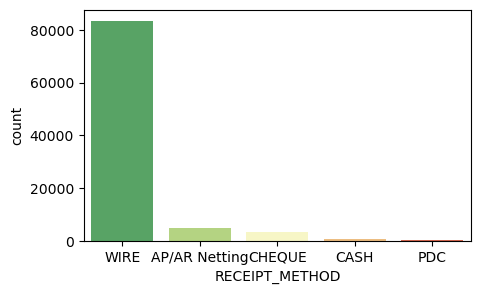

In [233]:
plt.figure(figsize = (5,3))
sns.countplot(data=df_received, x='RECEIPT_METHOD', palette='RdYlGn_r')
plt.show()

In [213]:
# Unique customer names
df_received['CUSTOMER_NAME'].nunique()

689

In [215]:
# Let is find the Top customers on the basis total invoices
df_received['CUSTOMER_NAME'].value_counts(ascending=False)

CUSTOMER_NAME
SEPH Corp    23075
FARO Corp    15004
PARF Corp     6624
ALLI Corp     5645
AREE Corp     2224
             ...  
MHM  Corp        1
HAJR Corp        1
RASH Corp        1
AHL  Corp        1
JOMA Corp        1
Name: count, Length: 689, dtype: int64

In [223]:
# Let is find the Top customers on the basis total invoice value
df_received.groupby('CUSTOMER_NAME')['USD Amount'].sum().sort_values(ascending = False)

CUSTOMER_NAME
SEPH Corp    3.253371e+10
FARO Corp    5.790071e+09
PARF Corp    3.200510e+09
ALLI Corp    2.580741e+09
AREE Corp    1.125144e+09
                 ...     
HEAT Corp    1.633500e+02
PEAC Corp    1.225200e+02
DESI Corp    1.166971e+02
BEX  Corp    7.805310e+01
NOUS Corp    5.065655e+00
Name: USD Amount, Length: 689, dtype: float64

In [ ]:
#let us look at CURRENCY_CODE"

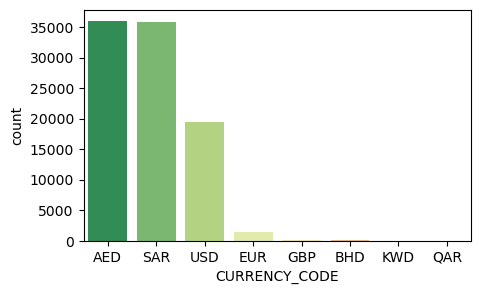

In [305]:
plt.figure(figsize = (5,3))
sns.countplot(data=df_received, x='CURRENCY_CODE', order = df_received['CURRENCY_CODE'].value_counts().index,  palette='RdYlGn_r')
plt.show()

Athough we have taken the invoice value in USD, the currency used for bill payments differs with majority of them in SAR or AED followed by USD

In [237]:
# INVOICE_ALLOCATED refers to Invoice number that has been allocated to a particular vendor. 
#This will not be useful for modelling so can be dropped

In [239]:
df_received.drop(['INVOICE_ALLOCATED'], axis = 1, inplace = True)

In [241]:
df_received.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CURRENCY_CODE', 'USD Amount', 'INVOICE_CREATION_DATE', 'DUE_DATE',
       'PAYMENT_TERM', 'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'delayed_payment', 'Time_to_payment',
       'payment_made_time'],
      dtype='object')

In [247]:
df_received['PAYMENT_TERM'].nunique() # there are 42 different payment terms. Let is look at them

42

In [249]:
df_received['PAYMENT_TERM'].value_counts() # there are similar payment terms with different categories. We can club them

PAYMENT_TERM
60 Days from Inv Date                                      19742
30 Days from Inv Date                                      14022
60 Days from EOM                                           12512
30 Days from EOM                                           11301
15 Days from EOM                                            7533
Immediate Payment                                           5468
Immediate                                                   4946
90 Days from EOM                                            3893
45 Days from Inv Date                                       3550
45 Days from EOM                                            3509
90 Days from Inv Date                                       2211
100% Adv Payment                                            1238
25 DAYS FROM EOM                                             462
Cash on Delivery                                             418
15 Days from Inv Date                                        356
45 DAYS + EO

In [253]:
df_received['PAYMENT_TERM'] = df_received['PAYMENT_TERM'].replace('45 DAYS + EOM', '45 Days from EOM')  
df_received['PAYMENT_TERM'] = df_received['PAYMENT_TERM'].replace(['Immediate Payment', 'Cash on Delivery','100% Adv Payment'], 'Immediate')  

In [255]:
df_received['PAYMENT_TERM'].value_counts()

PAYMENT_TERM
60 Days from Inv Date                                      19742
30 Days from Inv Date                                      14022
60 Days from EOM                                           12512
Immediate                                                  12070
30 Days from EOM                                           11301
15 Days from EOM                                            7533
90 Days from EOM                                            3893
45 Days from EOM                                            3831
45 Days from Inv Date                                       3550
90 Days from Inv Date                                       2211
25 DAYS FROM EOM                                             462
15 Days from Inv Date                                        356
On Consignment                                               264
EOM                                                          232
75 Days from EOM                                             197
120 Days fro

In [ ]:
#there are still mutiple categories of payment terms. We will come back to this later

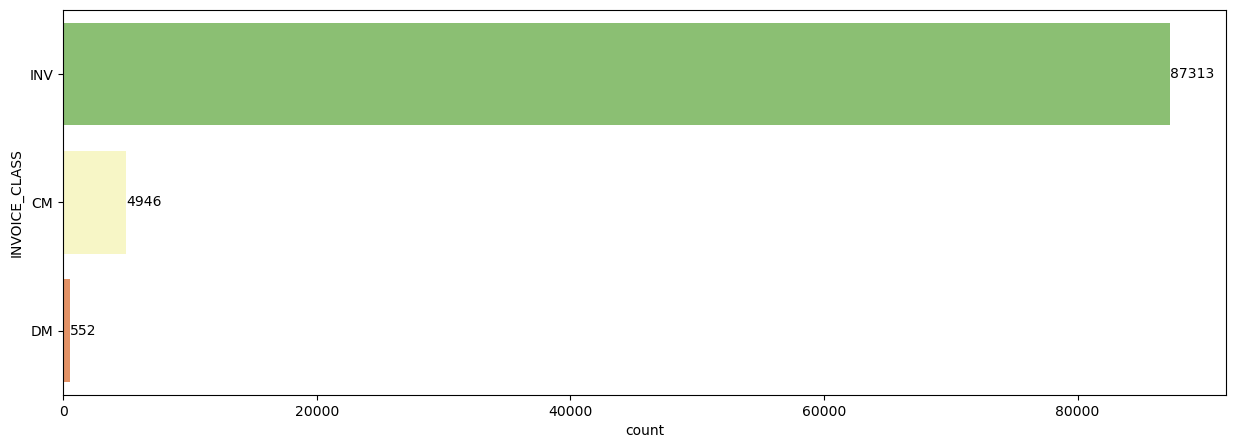

In [291]:
plt.figure(figsize = (15,5))
ax = sns.countplot(y= df_received['INVOICE_CLASS'], palette='RdYlGn_r')
plt.xticks()
for label in ax.containers:
    ax.bar_label(label)
plt.show()

In [293]:
df_received['INVOICE_CURRENCY_CODE'].nunique() # 10 unique currency codes

10

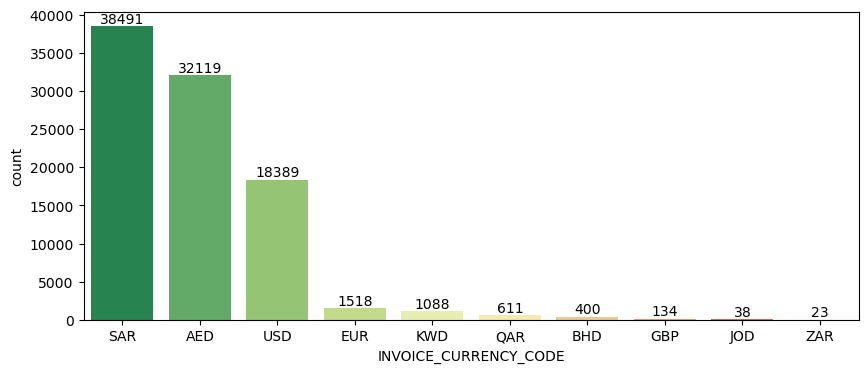

In [340]:
plt.figure(figsize = (10,4))
ax = sns.countplot(x = df_received['INVOICE_CURRENCY_CODE'], order = df_received['INVOICE_CURRENCY_CODE'].value_counts().index, palette='RdYlGn_r')
plt.xticks()
for label in ax.containers:
    ax.bar_label(label)
plt.show()
           

<Axes: xlabel='CURRENCY_CODE'>

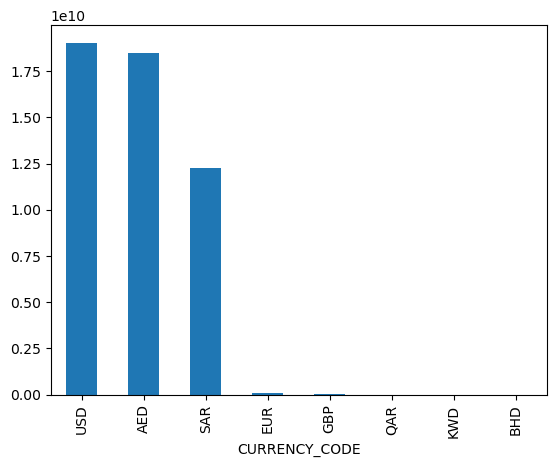

In [332]:
df_received.groupby('CURRENCY_CODE')['USD Amount'].sum().sort_values(ascending = False).plot.bar()
# based on the total amount of invoice values, majority are in USD, AED and SAR 

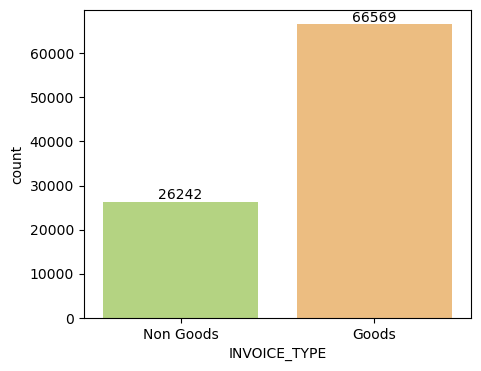

In [342]:
plt.figure(figsize = (5,4))
ax = sns.countplot(x = df_received['INVOICE_TYPE'], palette='RdYlGn_r')
plt.xticks()
for label in ax.containers:
    ax.bar_label(label)
plt.show()

In [ ]:
# We have added the target column earlier. let us check for any data imbalnace

In [344]:
df_received['delayed_payment'].value_counts(normalize=True)## approx 67% of te invoices are delayed payment while rest are on time

delayed_payment
1    0.676687
0    0.323313
Name: proportion, dtype: float64

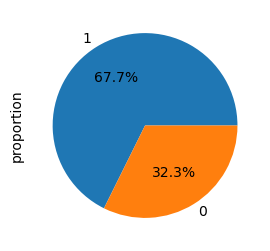

In [350]:
#let us also visualize this
plt.figure(figsize= (3,3))
df_received['delayed_payment'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.show()

In [3322]:
df_received[df_received['delayed_payment'] == 1]['USD Amount'].describe()

count    6.280400e+04
mean     5.149660e+05
std      9.879337e+05
min      1.287743e+00
25%      3.966833e+04
50%      1.642290e+05
75%      5.900000e+05
max      1.084983e+07
Name: USD Amount, dtype: float64

In [3324]:
df_received[df_received['delayed_payment'] == 0]['USD Amount'].describe()

count    3.000700e+04
mean     5.851146e+05
std      8.795789e+05
min      5.489449e+00
25%      4.144163e+04
50%      2.343677e+05
75%      7.266122e+05
max      6.836736e+06
Name: USD Amount, dtype: float64

**now let us perform some additonal anaysis of the data - Bivariate analysis**

In [365]:
df_received.groupby('INVOICE_CLASS')['delayed_payment'].sum()

INVOICE_CLASS
CM      4858
DM       493
INV    57453
Name: delayed_payment, dtype: int64

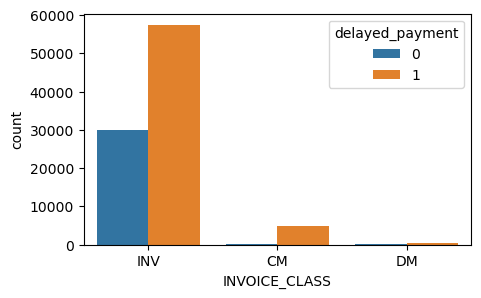

In [385]:
# delayed paymment by invoice class
plt.figure(figsize = (5,3))
sns.countplot(data = df_received, x = 'INVOICE_CLASS', hue ='delayed_payment')
plt.show()

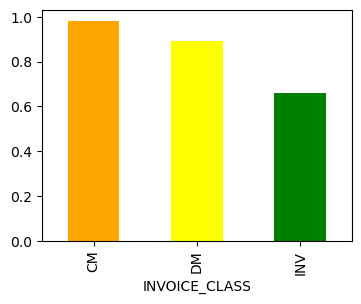

In [403]:
#as you can see while invoice class INV has highest number of delayed payment, it has the lowest percentage of delayed payments. 
#CM has higher percentage of delayed payments

plt.figure(figsize= (4,3))
df_received.groupby('INVOICE_CLASS')['delayed_payment'].mean().plot.bar(color =['Orange', 'Yellow', 'Green'] )
plt.show()

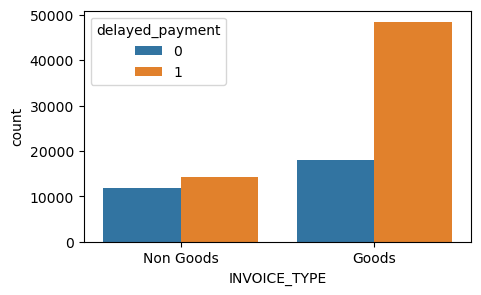

In [405]:
# delayed paymment by invoice type
plt.figure(figsize = (5,3))
sns.countplot(data = df_received, x = 'INVOICE_TYPE', hue ='delayed_payment')
plt.show()

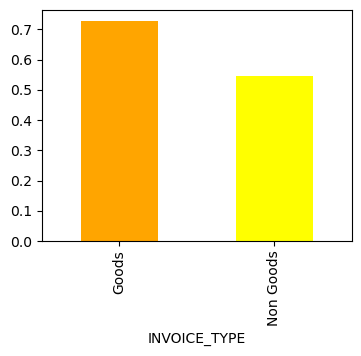

In [407]:
# invoice types goods have a higher percentage of delayed payment than non-goods
plt.figure(figsize= (4,3))
df_received.groupby('INVOICE_TYPE')['delayed_payment'].mean().plot.bar(color =['Orange', 'Yellow', 'Green'] )
plt.show()

In [ ]:
#now lets check the amount vs delayed payment 

In [433]:
amount_vs_delayed = df_received.pivot_table(values='USD Amount', index='delayed_payment', aggfunc=['mean', 'median','min', 'max', np.std]).reset_index()
amount_vs_delayed

,delayed_payment,mean,median,min,max,std
,,USD Amount,USD Amount,USD Amount,USD Amount,USD Amount
0,0,585114.557398,234367.68,5.489449,6836735.61,879578.895731
1,1,514966.049743,164229.02,1.287743,10849828.80,987933.735065


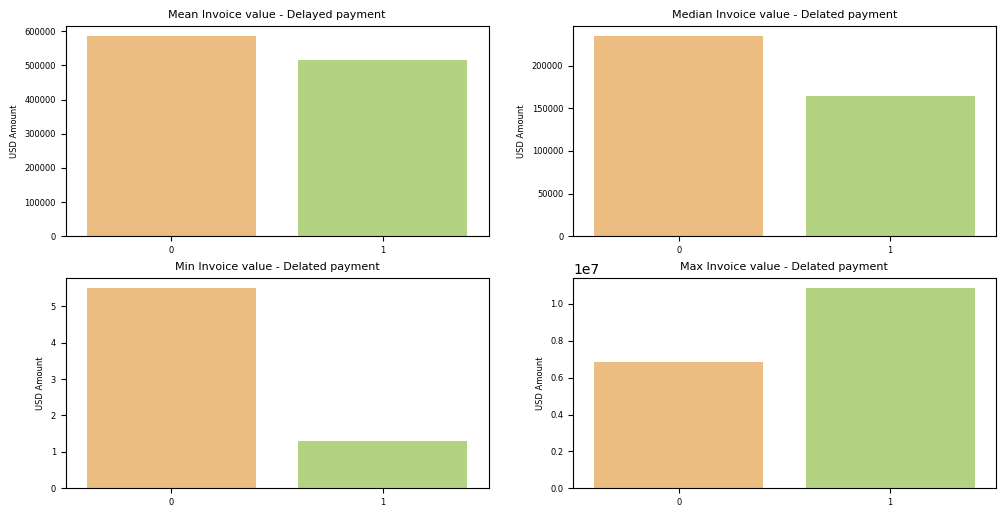

In [499]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot(data=amount_vs_delayed, x='delayed_payment', y=('mean','USD Amount'), palette='RdYlGn')
plt.title("Mean Invoice value - Delayed payment", fontsize = 8)
plt.xlabel("")
plt.xticks(fontsize=6) 
plt.yticks(fontsize=6)
plt.ylabel("USD Amount", fontsize = 6)

plt.subplot(2,2,2)
sns.barplot(data=amount_vs_delayed, x='delayed_payment', y=('median','USD Amount'), palette='RdYlGn')
plt.title("Median Invoice value - Delated payment", fontsize = 8)
plt.xlabel("")
plt.xticks(fontsize=6) 
plt.yticks(fontsize=6)
plt.ylabel("USD Amount", fontsize = 6)

plt.subplot(2,2,3)
sns.barplot(data=amount_vs_delayed, x='delayed_payment', y=('min','USD Amount'), palette='RdYlGn')
plt.title("Min Invoice value - Delated payment", fontsize = 8)
plt.xlabel("")
plt.xticks(fontsize=6) 
plt.yticks(fontsize=6)
plt.ylabel("USD Amount", fontsize = 6)


plt.subplot(2,2,4)
sns.barplot(data=amount_vs_delayed, x='delayed_payment', y=('max','USD Amount'), palette='RdYlGn')
plt.title("Max Invoice value - Delated payment", fontsize = 8)
plt.xlabel("")
plt.xticks(fontsize=6) 
plt.yticks(fontsize=6)
plt.ylabel("USD Amount", fontsize = 6)


plt.show()

In [ ]:
#payments without delay have a higher and median invoice value

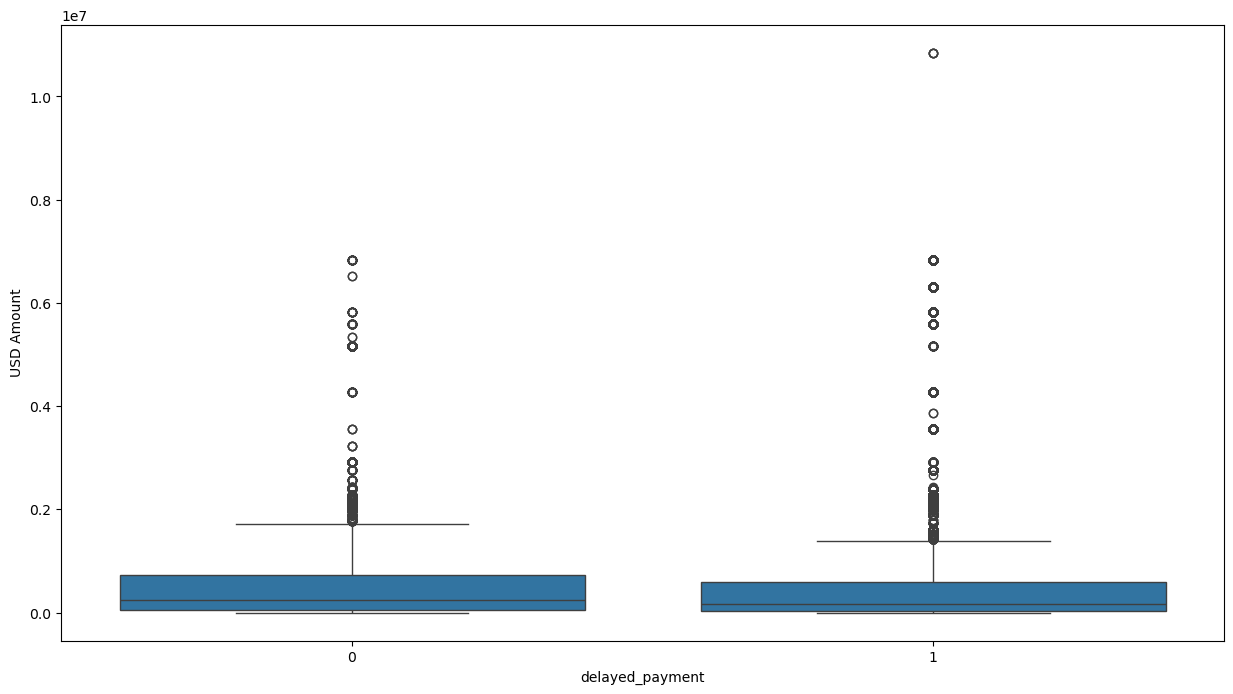

In [507]:
plt.figure(figsize= (15,8))
sns.boxplot(data = df_received, y = 'USD Amount', x = 'delayed_payment')
plt.show()

**Delayed payment by each customer**

In [555]:
invoice_by_cust = df_received['CUSTOMER_NAME'].value_counts()
invoice_by_cust

CUSTOMER_NAME
SEPH Corp    23075
FARO Corp    15004
PARF Corp     6624
ALLI Corp     5645
AREE Corp     2224
             ...  
MHM  Corp        1
HAJR Corp        1
RASH Corp        1
AHL  Corp        1
JOMA Corp        1
Name: count, Length: 689, dtype: int64

In [537]:
invoice_by_cust_delayed = df_received.groupby('CUSTOMER_NAME')['delayed_payment'].mean().sort_values(ascending=False).reset_index()
invoice_by_cust_delayed

,CUSTOMER_NAME,delayed_payment
0,ZV F Corp,1.0
1,HOSP Corp,1.0
2,JUMB Corp,1.0
3,JUBA Corp,1.0
4,JOUD Corp,1.0
...,...,...
684,LIVE Corp,0.0
685,LONG Corp,0.0
686,LOUV Corp,0.0
687,MALI Corp,0.0


In [ ]:
#let us look at customer with delayed payments

In [541]:
invoice_by_cust_delayed[invoice_by_cust_delayed['delayed_payment'] != 0] 

,CUSTOMER_NAME,delayed_payment
0,ZV F Corp,1.000000
1,HOSP Corp,1.000000
2,JUMB Corp,1.000000
3,JUBA Corp,1.000000
4,JOUD Corp,1.000000
...,...,...
602,STEP Corp,0.090909
603,KAMA Corp,0.090226
604,SPEC Corp,0.080000
605,BERN Corp,0.030769


In [551]:
round(len(invoice_by_cust_delayed[invoice_by_cust_delayed['delayed_payment'] != 0])/len(invoice_by_cust_delayed) * 100, 2)

88.1

In [ ]:
## 88% of customers have atleast 1 delayed payments among all their total invoices

In [ ]:
#lets look at top customer based on invoice amount

In [563]:
Total_invoice_amount_by_cust = df_received.groupby('CUSTOMER_NAME')['USD Amount'].sum().sort_values(ascending=False).reset_index()
Total_invoice_amount_by_cust

,CUSTOMER_NAME,USD Amount
0,SEPH Corp,3.253371e+10
1,FARO Corp,5.790071e+09
2,PARF Corp,3.200510e+09
3,ALLI Corp,2.580741e+09
4,AREE Corp,1.125144e+09
...,...,...
684,HEAT Corp,1.633500e+02
685,PEAC Corp,1.225200e+02
686,DESI Corp,1.166971e+02
687,BEX Corp,7.805310e+01


In [571]:
df_received_delayed = df_received[df_received['delayed_payment'] == 1]

Total_delayed_amount_by_cust= df_received_delayed.groupby(['CUSTOMER_NAME', 'delayed_payment'])['USD Amount'].sum().sort_values(ascending=False).reset_index()
Total_delayed_amount_by_cust

,CUSTOMER_NAME,delayed_payment,USD Amount
0,SEPH Corp,1,2.088524e+10
1,FARO Corp,1,4.073294e+09
2,PARF Corp,1,2.864593e+09
3,AREE Corp,1,9.036139e+08
4,ALLI Corp,1,7.610009e+08
...,...,...,...
602,HEAT Corp,1,1.633500e+02
603,PEAC Corp,1,1.225200e+02
604,FORE Corp,1,5.990470e+01
605,NOUS Corp,1,5.065655e+00


In [579]:
total_sum= Total_delayed_amount_by_cust['USD Amount'].sum()
total_sum

32341927788.078945

In [601]:
Total_delayed_amount_by_cust['Percentage'] = round(Total_delayed_amount_by_cust['USD Amount']/total_sum * 100,2)

In [615]:
Total_delayed_amount_by_cust['Cumulative_Sum'] = Total_delayed_amount_by_cust['Percentage'].cumsum()

In [641]:
Total_delayed_amount_by_cust.head(15)

,CUSTOMER_NAME,delayed_payment,USD Amount,Percentage,Cumulative_Sum
0,SEPH Corp,1,2.088524e+10,64.58,64.58
1,FARO Corp,1,4.073294e+09,12.59,77.17
2,PARF Corp,1,2.864593e+09,8.86,86.03
3,AREE Corp,1,9.036139e+08,2.79,88.82
4,ALLI Corp,1,7.610009e+08,2.35,91.17
5,HABC Corp,1,3.821867e+08,1.18,92.35
6,AL T Corp,1,2.272616e+08,0.70,93.05
7,RADW Corp,1,2.263180e+08,0.70,93.75
8,DUBA Corp,1,1.354983e+08,0.42,94.17
9,DEBE Corp,1,1.281884e+08,0.40,94.57


**15 customer have invoices that cover 95% of total invoice value in delayed payment. Let us check them delayed payment rate**


In [687]:
Total_delayed_amount_by_cust_1 = Total_delayed_amount_by_cust.loc[:14]['CUSTOMER_NAME']
Total_delayed_amount_by_cust_1 

0     SEPH Corp
1     FARO Corp
2     PARF Corp
3     AREE Corp
4     ALLI Corp
5     HABC Corp
6     AL T Corp
7     RADW Corp
8     DUBA Corp
9     DEBE Corp
10    L OR Corp
11    WAHR Corp
12    YOUG Corp
13    PCD  Corp
14    QATA Corp
Name: CUSTOMER_NAME, dtype: object

In [689]:
invoice_by_cust_delayed

,CUSTOMER_NAME,delayed_payment
0,ZV F Corp,1.0
1,HOSP Corp,1.0
2,JUMB Corp,1.0
3,JUBA Corp,1.0
4,JOUD Corp,1.0
...,...,...
684,LIVE Corp,0.0
685,LONG Corp,0.0
686,LOUV Corp,0.0
687,MALI Corp,0.0


In [691]:
invoice_by_cust_delayed_top15 = invoice_by_cust_delayed[invoice_by_cust_delayed['CUSTOMER_NAME'].isin(Total_delayed_amount_by_cust_1)]

In [693]:
invoice_by_cust_delayed_top15

,CUSTOMER_NAME,delayed_payment
229,YOUG Corp,1.000000
259,QATA Corp,0.956432
278,AL T Corp,0.918391
282,DUBA Corp,0.913793
313,PARF Corp,0.870622
329,WAHR Corp,0.838926
377,DEBE Corp,0.751524
392,FARO Corp,0.739469
395,HABC Corp,0.733238
400,AREE Corp,0.719424


In [ ]:
#lets visualize this

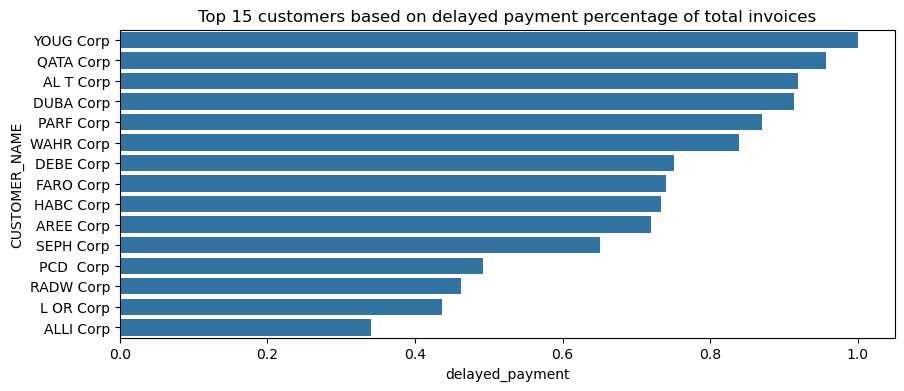

In [695]:
plt.figure(figsize=(10,4))
sns.barplot(data = invoice_by_cust_delayed_top15, x = 'delayed_payment', y = 'CUSTOMER_NAME')
plt.title ("Top 15 customers based on delayed payment percentage of total invoices")
plt.show()

In [ ]:
#let is also look based on number of orders

In [663]:
Total_orders_by_cust= df_received_delayed.groupby('CUSTOMER_NAME')['delayed_payment'].value_counts().sort_values(ascending=False).reset_index()
Total_orders_by_cust

,CUSTOMER_NAME,delayed_payment,count
0,SEPH Corp,1,15019
1,FARO Corp,1,11095
2,PARF Corp,1,5767
3,ALLI Corp,1,1920
4,DEBE Corp,1,1603
...,...,...,...
602,TAJ Corp,1,1
603,DARW Corp,1,1
604,SAFA Corp,1,1
605,MOHD Corp,1,1


In [677]:
#let us check for customers with more than 400 orders. There are 15 customers with more than 400 orders. 
#we checked for 100, 200,300 as well but since this number is high and we wnatd to resprsnt it in a chart

Total_orders_by_cust_top10 = Total_orders_by_cust[Total_orders_by_cust['count'] > 400]
Total_orders_by_cust_top10

,CUSTOMER_NAME,delayed_payment,count
0,SEPH Corp,1,15019
1,FARO Corp,1,11095
2,PARF Corp,1,5767
3,ALLI Corp,1,1920
4,DEBE Corp,1,1603
5,AREE Corp,1,1600
6,YOUG Corp,1,1480
7,HABC Corp,1,1028
8,AL T Corp,1,799
9,VAVA Corp,1,799


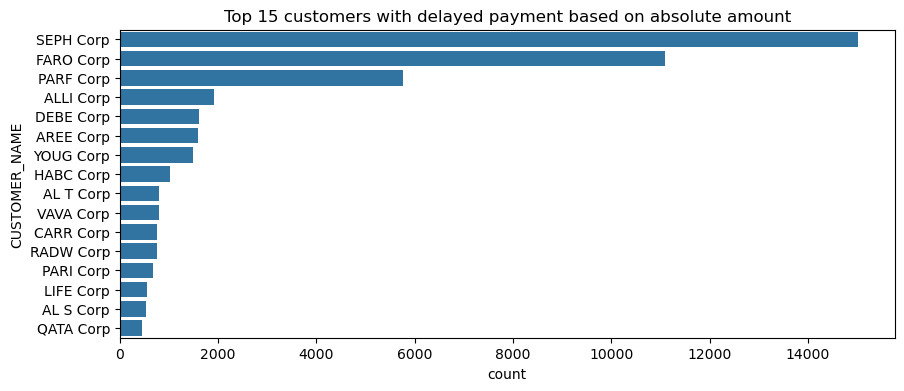

In [685]:
plt.figure(figsize=(10,4))
sns.barplot(data = Total_orders_by_cust_top10, x = 'count', y = 'CUSTOMER_NAME')
plt.title ("Top 15 customers with delayed payment based on absolute amount")
plt.show()

In [ ]:
# let us relook at the payment terms. There are still mutiple categories. Let see if we can combine some

In [705]:
df_received['PAYMENT_TERM'].value_counts(normalize=True)

PAYMENT_TERM
60 Days from Inv Date                                      0.212712
30 Days from Inv Date                                      0.151081
60 Days from EOM                                           0.134812
Immediate                                                  0.130049
30 Days from EOM                                           0.121764
15 Days from EOM                                           0.081165
90 Days from EOM                                           0.041945
45 Days from EOM                                           0.041277
45 Days from Inv Date                                      0.038250
90 Days from Inv Date                                      0.023823
25 DAYS FROM EOM                                           0.004978
15 Days from Inv Date                                      0.003836
On Consignment                                             0.002844
EOM                                                        0.002500
75 Days from EOM                   

In [707]:
#let us check the cumulative sum to see the distribution

df_received_payment_terms = df_received['PAYMENT_TERM'].value_counts(normalize=True).cumsum()

In [709]:
df_received_payment_terms # as you can see 95% of the payment terms are covered by 9 categories. So we can club the others in one category

PAYMENT_TERM
60 Days from Inv Date                                      0.212712
30 Days from Inv Date                                      0.363793
60 Days from EOM                                           0.498605
Immediate                                                  0.628654
30 Days from EOM                                           0.750418
15 Days from EOM                                           0.831582
90 Days from EOM                                           0.873528
45 Days from EOM                                           0.914805
45 Days from Inv Date                                      0.953055
90 Days from Inv Date                                      0.976878
25 DAYS FROM EOM                                           0.981856
15 Days from Inv Date                                      0.985691
On Consignment                                             0.988536
EOM                                                        0.991036
75 Days from EOM                   

In [717]:
payment_terms_top_95 = df_received_payment_terms.index[:9]

In [719]:
payment_terms_top_95

Index(['60 Days from Inv Date', '30 Days from Inv Date', '60 Days from EOM',
       'Immediate', '30 Days from EOM', '15 Days from EOM', '90 Days from EOM',
       '45 Days from EOM', '45 Days from Inv Date'],
      dtype='object', name='PAYMENT_TERM')

In [721]:
df_received['PAYMENT_TERM'] = df_received['PAYMENT_TERM'].apply(lambda x: x if x in payment_terms_top_95 else "Others")

In [723]:
df_received['PAYMENT_TERM'].value_counts()

PAYMENT_TERM
60 Days from Inv Date    19742
30 Days from Inv Date    14022
60 Days from EOM         12512
Immediate                12070
30 Days from EOM         11301
15 Days from EOM          7533
Others                    4357
90 Days from EOM          3893
45 Days from EOM          3831
45 Days from Inv Date     3550
Name: count, dtype: int64

**Dummy Encoding of categorical variables**

In [ ]:
#So first take a look at which variables are actually categorical variables

In [738]:
cat_var = df_received.loc[:, df_received.dtypes == 'object']

In [742]:
cat_var.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CURRENCY_CODE', 'PAYMENT_TERM',
       'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE', 'INVOICE_TYPE'],
      dtype='object')

In [756]:
#let us look at payment term
payment_term_ohe = pd.get_dummies(df_received['PAYMENT_TERM'], prefix="Payment_Term", drop_first=True, dtype='int64')
payment_term_ohe

,Payment_Term_30 Days from EOM,Payment_Term_30 Days from Inv Date,Payment_Term_45 Days from EOM,Payment_Term_45 Days from Inv Date,Payment_Term_60 Days from EOM,Payment_Term_60 Days from Inv Date,Payment_Term_90 Days from EOM,Payment_Term_Immediate,Payment_Term_Others
0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
93932,0,0,0,0,0,0,0,1,0
93933,0,0,0,0,0,0,0,1,0
93934,0,0,0,0,0,0,0,1,0
93935,0,0,0,0,0,1,0,0,0


In [766]:
# combine this with main data set

df_received = pd.concat([df_received, payment_term_ohe], axis  = 1)

In [768]:
df_received.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CURRENCY_CODE', 'USD Amount', 'INVOICE_CREATION_DATE', 'DUE_DATE',
       'PAYMENT_TERM', 'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'delayed_payment', 'Time_to_payment',
       'payment_made_time', 'Payment_Term_30 Days from EOM',
       'Payment_Term_30 Days from Inv Date', 'Payment_Term_45 Days from EOM',
       'Payment_Term_45 Days from Inv Date', 'Payment_Term_60 Days from EOM',
       'Payment_Term_60 Days from Inv Date', 'Payment_Term_90 Days from EOM',
       'Payment_Term_Immediate', 'Payment_Term_Others'],
      dtype='object')

In [772]:
df_received.drop(['PAYMENT_TERM'], axis = 1, inplace = True)

In [776]:
df_received.shape

(92811, 23)

In [784]:
cat_ohe = pd.get_dummies(df_received[['INVOICE_CLASS', 'RECEIPT_METHOD',  'INVOICE_TYPE']], drop_first=True, dtype='int64')

In [786]:
cat_ohe

,INVOICE_CLASS_DM,INVOICE_CLASS_INV,RECEIPT_METHOD_CASH,RECEIPT_METHOD_CHEQUE,RECEIPT_METHOD_PDC,RECEIPT_METHOD_WIRE,INVOICE_TYPE_Non Goods
0,0,1,0,0,0,1,1
1,0,1,0,0,0,1,1
2,0,1,0,0,0,1,1
3,0,1,0,0,0,1,1
4,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...
93932,0,0,0,0,0,1,0
93933,0,0,0,0,0,1,0
93934,0,0,0,0,0,1,0
93935,0,1,0,0,0,1,0


In [788]:
df_received = pd.concat([df_received, cat_ohe], axis = 1)

In [790]:
df_received.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,INVOICE_CLASS,INVOICE_CURRENCY_CODE,...,Payment_Term_90 Days from EOM,Payment_Term_Immediate,Payment_Term_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,RECEIPT_METHOD_CASH,RECEIPT_METHOD_CHEQUE,RECEIPT_METHOD_PDC,RECEIPT_METHOD_WIRE,INVOICE_TYPE_Non Goods
0,WIRE,C EA Corp,37403,2021-04-20,USD,101018.63040,2020-11-02,2020-12-30,INV,AED,...,0,0,0,0,1,0,0,0,1,1
1,WIRE,RADW Corp,4003,2021-01-31,SAR,48990.21133,2020-12-29,2021-01-28,INV,SAR,...,0,0,0,0,1,0,0,0,1,1
2,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,2021-01-30,2021-03-01,INV,SAR,...,0,0,0,0,1,0,0,0,1,1
3,WIRE,FARO Corp,1409,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,INV,SAR,...,0,0,0,0,1,0,0,0,1,1
4,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,INV,SAR,...,0,0,0,0,1,0,0,0,1,1


In [794]:
#dropping original variable for whoch dummies have been created

df_received.drop(['INVOICE_CLASS', 'RECEIPT_METHOD',  'INVOICE_TYPE'], axis = 1, inplace = True)

In [796]:
df_received.head()

,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,INVOICE_CURRENCY_CODE,delayed_payment,Time_to_payment,...,Payment_Term_90 Days from EOM,Payment_Term_Immediate,Payment_Term_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,RECEIPT_METHOD_CASH,RECEIPT_METHOD_CHEQUE,RECEIPT_METHOD_PDC,RECEIPT_METHOD_WIRE,INVOICE_TYPE_Non Goods
0,C EA Corp,37403,2021-04-20,USD,101018.63040,2020-11-02,2020-12-30,AED,1,58,...,0,0,0,0,1,0,0,0,1,1
1,RADW Corp,4003,2021-01-31,SAR,48990.21133,2020-12-29,2021-01-28,SAR,1,30,...,0,0,0,0,1,0,0,0,1,1
2,RADW Corp,4003,2021-01-31,SAR,41991.60971,2021-01-30,2021-03-01,SAR,0,30,...,0,0,0,0,1,0,0,0,1,1
3,FARO Corp,1409,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,SAR,1,30,...,0,0,0,0,1,0,0,0,1,1
4,RADW Corp,4003,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,SAR,1,30,...,0,0,0,0,1,0,0,0,1,1


In [798]:
df_received.shape

(92811, 27)

In [800]:
df_received.columns

Index(['CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE', 'CURRENCY_CODE',
       'USD Amount', 'INVOICE_CREATION_DATE', 'DUE_DATE',
       'INVOICE_CURRENCY_CODE', 'delayed_payment', 'Time_to_payment',
       'payment_made_time', 'Payment_Term_30 Days from EOM',
       'Payment_Term_30 Days from Inv Date', 'Payment_Term_45 Days from EOM',
       'Payment_Term_45 Days from Inv Date', 'Payment_Term_60 Days from EOM',
       'Payment_Term_60 Days from Inv Date', 'Payment_Term_90 Days from EOM',
       'Payment_Term_Immediate', 'Payment_Term_Others', 'INVOICE_CLASS_DM',
       'INVOICE_CLASS_INV', 'RECEIPT_METHOD_CASH', 'RECEIPT_METHOD_CHEQUE',
       'RECEIPT_METHOD_PDC', 'RECEIPT_METHOD_WIRE', 'INVOICE_TYPE_Non Goods'],
      dtype='object')

In [806]:
df_received['CURRENCY_CODE'].value_counts(normalize=True).cumsum()
# 98% of the payment currency code is AED, SAR or USD

CURRENCY_CODE
AED    0.388176
SAR    0.773734
USD    0.982340
EUR    0.997834
GBP    0.999235
BHD    0.999871
KWD    0.999978
QAR    1.000000
Name: proportion, dtype: float64

In [808]:
df_received['INVOICE_CURRENCY_CODE'].value_counts(normalize=True).cumsum()
# 98% of the innvoice currency code is AED, SAR or USD

INVOICE_CURRENCY_CODE
SAR    0.414725
AED    0.760793
USD    0.958927
EUR    0.975283
KWD    0.987006
QAR    0.993589
BHD    0.997899
GBP    0.999343
JOD    0.999752
ZAR    1.000000
Name: proportion, dtype: float64

In [828]:
df_received.pivot_table(values = 'CUSTOMER_NAME',  columns= 'INVOICE_CURRENCY_CODE', index='CURRENCY_CODE', aggfunc='count', fill_value = "")

INVOICE_CURRENCY_CODE,AED,BHD,EUR,GBP,JOD,KWD,QAR,SAR,USD,ZAR
CURRENCY_CODE,,,,,,,,,,
AED,30966,103,67,,28,133,17,2179,2534,
BHD,,56,,,,,,,3,
EUR,4,,1395,,,,,,39,
GBP,,,,129,,,,,1,
KWD,,,,,,10,,,,
QAR,,,,,,,,,2,
SAR,25,5,4,,,6,,35581,163,
USD,1124,236,52,5,10,939,594,731,15647,23


In [830]:
df_received.pivot_table(values = 'CUSTOMER_NAME',  columns= 'INVOICE_CURRENCY_CODE', index='delayed_payment', aggfunc='count', fill_value = "")

INVOICE_CURRENCY_CODE,AED,BHD,EUR,GBP,JOD,KWD,QAR,SAR,USD,ZAR
delayed_payment,,,,,,,,,,
0,15715,150,874,23,,310,110,8368,4457,
1,16404,250,644,111,38,778,501,30123,13932,23


In [832]:
df_received.pivot_table(values = 'CUSTOMER_NAME',  columns= 'CURRENCY_CODE', index='delayed_payment', aggfunc='count', fill_value = "")

CURRENCY_CODE,AED,BHD,EUR,GBP,KWD,QAR,SAR,USD
delayed_payment,,,,,,,,
0,17796,41,839,19,,,6642,4670
1,18231,18,599,111,10,2,29142,14691


In [ ]:
# we will keep the invoice currency code and create dummy. First we will keep the top there and club rest as others

In [848]:
inv_curr_cumsum = df_received['INVOICE_CURRENCY_CODE'].value_counts(normalize=True).cumsum()
inv_curr_cumsum = inv_curr_cumsum[:3]
inv_curr_cumsum

INVOICE_CURRENCY_CODE
SAR    0.414725
AED    0.760793
USD    0.958927
Name: proportion, dtype: float64

In [850]:
df_received['INVOICE_CURRENCY_CODE'] = df_received['INVOICE_CURRENCY_CODE'].apply(lambda x: x if x in inv_curr_cumsum else "Other_Curr")

In [854]:
df_received['INVOICE_CURRENCY_CODE'].value_counts()

INVOICE_CURRENCY_CODE
SAR           38491
AED           32119
USD           18389
Other_Curr     3812
Name: count, dtype: int64

In [856]:
invoice_curr_code = pd.get_dummies(df_received['INVOICE_CURRENCY_CODE'], drop_first= True, dtype='int64')

In [858]:
invoice_curr_code

,Other_Curr,SAR,USD
0,0,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
93932,0,0,1
93933,0,0,1
93934,0,0,1
93935,0,0,0


In [860]:
df_received = pd.concat([df_received, invoice_curr_code], axis = 1)

In [ ]:
df_received.drop(['INVOICE_CURRENCY_CODE'], axis = 1, inplace = True)

In [873]:
#also droping currency code
df_received.drop(['CURRENCY_CODE'], axis = 1, inplace = True)

In [875]:
df_received.columns

Index(['CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE', 'USD Amount',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'delayed_payment',
       'Time_to_payment', 'payment_made_time', 'Payment_Term_30 Days from EOM',
       'Payment_Term_30 Days from Inv Date', 'Payment_Term_45 Days from EOM',
       'Payment_Term_45 Days from Inv Date', 'Payment_Term_60 Days from EOM',
       'Payment_Term_60 Days from Inv Date', 'Payment_Term_90 Days from EOM',
       'Payment_Term_Immediate', 'Payment_Term_Others', 'INVOICE_CLASS_DM',
       'INVOICE_CLASS_INV', 'RECEIPT_METHOD_CASH', 'RECEIPT_METHOD_CHEQUE',
       'RECEIPT_METHOD_PDC', 'RECEIPT_METHOD_WIRE', 'INVOICE_TYPE_Non Goods',
       'Other_Curr', 'SAR', 'USD'],
      dtype='object')

In [877]:
df_received.shape

(92811, 28)

In [ ]:
#now let us look at the open_invoice data 

In [949]:
df_open_invoice.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,21/12/2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,03/03/2022,USD,"2,000",INVOICE,33,"2,000",2/1/2022 14:09
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,15 Days from Inv Date,19/01/2022,AED,"2,415",INVOICE,76,"2,415",1/5/2022 11:49
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30


In [1021]:
df_open_invoice.columns

Index(['AS_OF_DATE', 'Customer Type', 'Customer_Name', 'Customer Account No',
       'Transaction Number', 'Transaction Date', 'Payment Term', 'Due Date',
       'Transaction Currency', 'Local Amount', 'Transaction Class', 'AGE',
       'USD Amount', 'INV_CREATION_DATE'],
      dtype='object')

In [1023]:
df_open_invoice.shape

(88204, 14)

In [ ]:
# we will apply the same on open invoice data that was done on the feature engineering done on recieved data set. 

In [1176]:
# lets dorp columns that are not there in the receiced payment dataset
df_open_invoice.drop(['AS_OF_DATE','Customer Type','Transaction Number','Transaction Date'
              'Customer Account No','Local Amount'], axis= 1, inplace= True)

In [1178]:
df_open_invoice.columns

Index(['Customer_Name', 'Payment Term', 'Due Date', 'Transaction Currency',
       'Transaction Class', 'AGE', 'USD Amount', 'INV_CREATION_DATE'],
      dtype='object')

In [1180]:
df_open_invoice.shape

(88204, 8)

In [1182]:
df_open_invoice.head()

,Customer_Name,Payment Term,Due Date,Transaction Currency,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,GIVE Corp,Immediate,21/12/2021,AED,CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,AL J Corp,30 Days from Inv Date,03/03/2022,USD,INVOICE,33,"2,000",2/1/2022 14:09
2,AL J Corp,30 Days from Inv Date,23/04/2022,USD,INVOICE,-18,"2,000",3/24/2022 17:46
3,AL R Corp,15 Days from Inv Date,19/01/2022,AED,INVOICE,76,"2,415",1/5/2022 11:49
4,ALLI Corp,30 Days from EOM,30/04/2022,AED,INVOICE,-25,"3,800",3/3/2022 22:30


In [1184]:
df_open_invoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88204 entries, 0 to 88203
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Customer_Name         88204 non-null  object
 1   Payment Term          88204 non-null  object
 2   Due Date              88204 non-null  object
 3   Transaction Currency  88204 non-null  object
 4   Transaction Class     88204 non-null  object
 5   AGE                   88204 non-null  int64 
 6   USD Amount            88204 non-null  object
 7   INV_CREATION_DATE     88204 non-null  object
dtypes: int64(1), object(7)
memory usage: 5.4+ MB


In [1186]:
df_open_invoice.isnull().sum() # no null values

Customer_Name           0
Payment Term            0
Due Date                0
Transaction Currency    0
Transaction Class       0
AGE                     0
USD Amount              0
INV_CREATION_DATE       0
dtype: int64

In [1188]:
# format of 'Due Date' and 'INV_CREATION_DATE' to  datetime
df_open_invoice['Due Date'] = pd.to_datetime(df_open_invoice['Due Date'])
df_open_invoice['INV_CREATION_DATE'] = pd.to_datetime(df_open_invoice['INV_CREATION_DATE'])

In [969]:
df_open_invoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88204 entries, 0 to 88203
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_Name      88204 non-null  object        
 1   Payment Term       88204 non-null  object        
 2   Due Date           88204 non-null  datetime64[ns]
 3   Transaction Class  88204 non-null  object        
 4   AGE                88204 non-null  int64         
 5   USD Amount         88204 non-null  object        
 6   INV_CREATION_DATE  88204 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 4.7+ MB


In [ ]:
#let us look at the columns

In [1190]:
df_open_invoice['Transaction Class'].value_counts() # it has an additional category payment

Transaction Class
INVOICE        79523
CREDIT NOTE     5954
PAYMENT         1443
DEBIT NOTE      1284
Name: count, dtype: int64

In [1192]:
#convert USD amount to numerical
df_open_invoice['USD Amount'].dtype

dtype('O')

In [1194]:
df_open_invoice['USD Amount'].head()

0    -3,088
1     2,000
2     2,000
3     2,415
4     3,800
Name: USD Amount, dtype: object

In [1196]:
df_open_invoice['USD Amount'] = df_open_invoice['USD Amount'].apply(lambda x: x.replace(",", ""))
df_open_invoice['USD Amount'] = df_open_invoice['USD Amount'].astype(int)

In [1198]:
df_open_invoice['USD Amount'].dtype

dtype('int32')

In [1200]:
df_open_invoice[df_open_invoice['USD Amount'] < 0] # there are negatvie values in USD amount

,Customer_Name,Payment Term,Due Date,Transaction Currency,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,GIVE Corp,Immediate,2021-12-21,AED,CREDIT NOTE,105,-3088,2021-12-21 12:53:00
26,FITR Corp,Immediate,2021-03-08,AED,CREDIT NOTE,393,-27813,2021-03-08 16:03:00
86,MACH Corp,Immediate,2020-05-31,AED,CREDIT NOTE,674,-154,2020-06-01 14:51:00
102,QATA Corp,Immediate,2021-12-16,AED,CREDIT NOTE,110,-3048,2021-12-19 12:34:00
113,AL S Corp,Immediate,2018-12-23,KWD,CREDIT NOTE,1199,-4777,2018-12-23 12:58:00
...,...,...,...,...,...,...,...,...
88185,SAUD Corp,Immediate,2022-02-16,USD,CREDIT NOTE,48,-57279,2022-02-16 17:20:00
88193,ALLI Corp,Immediate,2022-01-05,AED,CREDIT NOTE,90,-14,2022-01-05 11:49:00
88194,ALLI Corp,Immediate,2022-01-05,AED,CREDIT NOTE,90,-45,2022-01-05 13:05:00
88199,FITR Corp,Immediate,2021-08-01,USD,CREDIT NOTE,247,-1199,2021-08-01 15:33:00


In [935]:
len(df_open_invoice[df_open_invoice['USD Amount'] < 0]) ## there are records containing -ve amounts. We can remove them


8424

In [1202]:
df_open_invoice = df_open_invoice[df_open_invoice['USD Amount'] > 0]

In [1204]:
df_open_invoice.head()

,Customer_Name,Payment Term,Due Date,Transaction Currency,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
1,AL J Corp,30 Days from Inv Date,2022-03-03,USD,INVOICE,33,2000,2022-02-01 14:09:00
2,AL J Corp,30 Days from Inv Date,2022-04-23,USD,INVOICE,-18,2000,2022-03-24 17:46:00
3,AL R Corp,15 Days from Inv Date,2022-01-19,AED,INVOICE,76,2415,2022-01-05 11:49:00
4,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,3800,2022-03-03 22:30:00
5,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,1264,2022-03-03 22:30:00


In [1206]:
df_open_invoice.shape

(79516, 8)

In [1208]:
df_open_invoice['Payment Term'].value_counts()

Payment Term
30 Days from Inv Date                                      18328
60 Days from Inv Date                                      17599
Immediate Payment                                          16202
60 Days from EOM                                            8170
30 Days from EOM                                            5324
90 Days from EOM                                            2595
90 Days from Inv Date                                       2429
75 Days from EOM                                            1646
45 Days from Inv Date                                       1533
100% Adv Payment                                            1317
15 Days from EOM                                            1097
45 Days from EOM                                             854
120 Days from EOM                                            800
EOM                                                          340
75 Days from Inv Date                                        261
25 DAYS FROM

In [1210]:
df_open_invoice['Payment Term'] = df_open_invoice['Payment Term'].replace('45 DAYS + EOM', '45 Days from EOM')  
df_open_invoice['Payment Term'] = df_open_invoice['Payment Term'].replace(['Immediate Payment', 'Cash on Delivery','100% Adv Payment'], 'Immediate')  

In [1212]:
df_open_invoice['Payment Term'].value_counts()

Payment Term
30 Days from Inv Date                                      18328
Immediate                                                  17659
60 Days from Inv Date                                      17599
60 Days from EOM                                            8170
30 Days from EOM                                            5324
90 Days from EOM                                            2595
90 Days from Inv Date                                       2429
75 Days from EOM                                            1646
45 Days from Inv Date                                       1533
15 Days from EOM                                            1097
45 Days from EOM                                             938
120 Days from EOM                                            800
EOM                                                          340
75 Days from Inv Date                                        261
25 DAYS FROM EOM                                             172
15 Days from

In [1214]:
# Match the categories from recieved payment dataset
df_open_invoice['Payment Term'] = df_open_invoice['Payment Term'].apply(lambda x: x if x in payment_terms_top_95 else "Others")

In [1216]:
df_open_invoice['Payment Term'].value_counts()

Payment Term
30 Days from Inv Date    18328
Immediate                17659
60 Days from Inv Date    17599
60 Days from EOM          8170
Others                    6273
30 Days from EOM          5324
90 Days from EOM          2595
45 Days from Inv Date     1533
15 Days from EOM          1097
45 Days from EOM           938
Name: count, dtype: int64

In [1218]:
##create dummy variable for payment term

open_data_pymnt_ohe = pd.get_dummies(df_open_invoice['Payment Term'],drop_first=True, prefix = 'Payment_Term', dtype='int64')

In [1082]:
open_data_pymnt_ohe

,Payment_Term_30 Days from EOM,Payment_Term_30 Days from Inv Date,Payment_Term_45 Days from EOM,Payment_Term_45 Days from Inv Date,Payment_Term_60 Days from EOM,Payment_Term_60 Days from Inv Date,Payment_Term_90 Days from EOM,Payment_Term_Immediate,Payment_Term_Others
1,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
88197,0,0,0,0,0,0,0,0,1
88198,0,0,0,0,0,0,0,0,1
88201,1,0,0,0,0,0,0,0,0
88202,0,0,0,0,0,1,0,0,0


In [1220]:
df_open_invoice = pd.concat([df_open_invoice, open_data_pymnt_ohe], axis=1)

In [1222]:
#drop payment term
df_open_invoice.drop(['Payment Term'], inplace = True, axis = 1)

In [1224]:
df_open_invoice.columns

Index(['Customer_Name', 'Due Date', 'Transaction Currency',
       'Transaction Class', 'AGE', 'USD Amount', 'INV_CREATION_DATE',
       'Payment_Term_30 Days from EOM', 'Payment_Term_30 Days from Inv Date',
       'Payment_Term_45 Days from EOM', 'Payment_Term_45 Days from Inv Date',
       'Payment_Term_60 Days from EOM', 'Payment_Term_60 Days from Inv Date',
       'Payment_Term_90 Days from EOM', 'Payment_Term_Immediate',
       'Payment_Term_Others'],
      dtype='object')

In [1226]:
df_received.columns

Index(['CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE', 'USD Amount',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'delayed_payment',
       'Time_to_payment', 'payment_made_time', 'Payment_Term_30 Days from EOM',
       'Payment_Term_30 Days from Inv Date', 'Payment_Term_45 Days from EOM',
       'Payment_Term_45 Days from Inv Date', 'Payment_Term_60 Days from EOM',
       'Payment_Term_60 Days from Inv Date', 'Payment_Term_90 Days from EOM',
       'Payment_Term_Immediate', 'Payment_Term_Others', 'INVOICE_CLASS_DM',
       'INVOICE_CLASS_INV', 'RECEIPT_METHOD_CASH', 'RECEIPT_METHOD_CHEQUE',
       'RECEIPT_METHOD_PDC', 'RECEIPT_METHOD_WIRE', 'INVOICE_TYPE_Non Goods',
       'Other_Curr', 'SAR', 'USD'],
      dtype='object')

In [1228]:
#let create the time_to_payment column in the open invoice data
df_open_invoice['Time_to_payment'] = df_open_invoice.apply(lambda x: x['Due Date'] - x['INV_CREATION_DATE'], axis=1)

In [1230]:
df_open_invoice['Time_to_payment'] = df_open_invoice['Time_to_payment'].dt.days

In [1232]:
df_open_invoice.columns

Index(['Customer_Name', 'Due Date', 'Transaction Currency',
       'Transaction Class', 'AGE', 'USD Amount', 'INV_CREATION_DATE',
       'Payment_Term_30 Days from EOM', 'Payment_Term_30 Days from Inv Date',
       'Payment_Term_45 Days from EOM', 'Payment_Term_45 Days from Inv Date',
       'Payment_Term_60 Days from EOM', 'Payment_Term_60 Days from Inv Date',
       'Payment_Term_90 Days from EOM', 'Payment_Term_Immediate',
       'Payment_Term_Others', 'Time_to_payment'],
      dtype='object')

In [1234]:
# Checking the categories in the column Transaction class
df_open_invoice['Transaction Class'].value_counts() # 2 categories see. Let us convert them to be similar to the received data

Transaction Class
INVOICE       78251
DEBIT NOTE     1265
Name: count, dtype: int64

In [1236]:
df_open_invoice['Transaction Class'] = df_open_invoice['Transaction Class'].apply(lambda x: 'INV' if x == 'INVOICE' else 'DM')

In [1238]:
df_open_invoice['Transaction Class'].value_counts()

Transaction Class
INV    78251
DM      1265
Name: count, dtype: int64

In [1240]:
#covert Transaction to dummy

open_trans = pd.get_dummies(df_open_invoice['Transaction Class'], prefix = 'INVOICE_CLASS', dtype='int64')

In [1242]:
open_trans

,INVOICE_CLASS_DM,INVOICE_CLASS_INV
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
...,...,...
88197,0,1
88198,0,1
88201,0,1
88202,0,1


In [1244]:
df_open_invoice = pd.concat([df_open_invoice, open_trans], axis = 1)

In [1246]:
df_open_invoice.drop(['Transaction Class'], axis = 1, inplace = True)

In [1248]:
df_open_invoice.columns

Index(['Customer_Name', 'Due Date', 'Transaction Currency', 'AGE',
       'USD Amount', 'INV_CREATION_DATE', 'Payment_Term_30 Days from EOM',
       'Payment_Term_30 Days from Inv Date', 'Payment_Term_45 Days from EOM',
       'Payment_Term_45 Days from Inv Date', 'Payment_Term_60 Days from EOM',
       'Payment_Term_60 Days from Inv Date', 'Payment_Term_90 Days from EOM',
       'Payment_Term_Immediate', 'Payment_Term_Others', 'Time_to_payment',
       'INVOICE_CLASS_DM', 'INVOICE_CLASS_INV'],
      dtype='object')

In [1266]:
Trans_Currency = df_open_invoice['Transaction Currency'].value_counts(normalize = True).cumsum()
#we use AED SAR and USD in recieved and clubs others are reeived.  Let use the same
Trans_Currency = Trans_Currency[0:3]
Trans_Currency

Transaction Currency
SAR    0.461429
AED    0.709895
USD    0.860003
Name: proportion, dtype: float64

In [1268]:
df_open_invoice['Transaction Currency'] = df_open_invoice['Transaction Currency'].apply(lambda x: x if x in Trans_Currency else "Other_Curr")

In [1274]:
Trans_Currency_ohe = pd.get_dummies(df_open_invoice['Transaction Currency'], drop_first= True, dtype = 'int64')

In [1276]:
df_open_invoice = pd.concat([df_open_invoice,Trans_Currency_ohe], axis = 1)

In [1280]:
df_open_invoice.drop(['Transaction Currency'], axis= 1, inplace = True)

In [1282]:
df_open_invoice.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,Payment_Term_30 Days from EOM,Payment_Term_30 Days from Inv Date,Payment_Term_45 Days from EOM,Payment_Term_45 Days from Inv Date,Payment_Term_60 Days from EOM,Payment_Term_60 Days from Inv Date,Payment_Term_90 Days from EOM,Payment_Term_Immediate,Payment_Term_Others,Time_to_payment,INVOICE_CLASS_DM,INVOICE_CLASS_INV,Other_Curr,SAR,USD
1,AL J Corp,2022-03-03,33,2000,2022-02-01 14:09:00,0,1,0,0,0,0,0,0,0,29,0,1,0,0,1
2,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,1,0,0,0,0,0,0,0,29,0,1,0,0,1
3,AL R Corp,2022-01-19,76,2415,2022-01-05 11:49:00,0,0,0,0,0,0,0,0,1,13,0,1,0,0,0
4,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,1,0,0,0,0,0,0,0,0,57,0,1,0,0,0
5,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,1,0,0,0,0,0,0,0,0,57,0,1,0,0,0


In [1286]:
df_open_invoice.columns

Index(['Customer_Name', 'Due Date', 'AGE', 'USD Amount', 'INV_CREATION_DATE',
       'Payment_Term_30 Days from EOM', 'Payment_Term_30 Days from Inv Date',
       'Payment_Term_45 Days from EOM', 'Payment_Term_45 Days from Inv Date',
       'Payment_Term_60 Days from EOM', 'Payment_Term_60 Days from Inv Date',
       'Payment_Term_90 Days from EOM', 'Payment_Term_Immediate',
       'Payment_Term_Others', 'Time_to_payment', 'INVOICE_CLASS_DM',
       'INVOICE_CLASS_INV', 'Other_Curr', 'SAR', 'USD'],
      dtype='object')

**Customer-level attributes could also be important independent variables to be included in the model. A customer-level attribute can be determined via customer segmentation. You have to segment your customers based on two derived variables: the average payment time in days for a customer and the standard deviation for the payment time. Using clustering techniques would result in a few distinct clusters of customers, which can be used as an input variable for the ML model**

In [ ]:
#lets do customer segmentation

In [1289]:
df_received.head()

,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,delayed_payment,Time_to_payment,payment_made_time,Payment_Term_30 Days from EOM,...,INVOICE_CLASS_DM,INVOICE_CLASS_INV,RECEIPT_METHOD_CASH,RECEIPT_METHOD_CHEQUE,RECEIPT_METHOD_PDC,RECEIPT_METHOD_WIRE,INVOICE_TYPE_Non Goods,Other_Curr,SAR,USD
0,C EA Corp,37403,2021-04-20,101018.63040,2020-11-02,2020-12-30,1,58,-111,1,...,0,1,0,0,0,1,1,0,0,0
1,RADW Corp,4003,2021-01-31,48990.21133,2020-12-29,2021-01-28,1,30,-3,0,...,0,1,0,0,0,1,1,0,1,0
2,RADW Corp,4003,2021-01-31,41991.60971,2021-01-30,2021-03-01,0,30,29,0,...,0,1,0,0,0,1,1,0,1,0
3,FARO Corp,1409,2021-01-31,41991.60971,2020-12-15,2021-01-14,1,30,-17,0,...,0,1,0,0,0,1,1,0,1,0
4,RADW Corp,4003,2021-01-31,41991.60971,2020-12-15,2021-01-14,1,30,-17,0,...,0,1,0,0,0,1,1,0,1,0


In [1291]:
df_received['actual_payment_made_time'] = df_received.apply(lambda x: x['RECEIPT_DATE'] - x['INVOICE_CREATION_D'], axis=1)

In [1295]:
df_received['actual_payment_made_time'] = df_received['actual_payment_made_time'].dt.days

In [1297]:
df_received.head()

,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,delayed_payment,Time_to_payment,payment_made_time,Payment_Term_30 Days from EOM,...,INVOICE_CLASS_INV,RECEIPT_METHOD_CASH,RECEIPT_METHOD_CHEQUE,RECEIPT_METHOD_PDC,RECEIPT_METHOD_WIRE,INVOICE_TYPE_Non Goods,Other_Curr,SAR,USD,actual_payment_made_time
0,C EA Corp,37403,2021-04-20,101018.63040,2020-11-02,2020-12-30,1,58,-111,1,...,1,0,0,0,1,1,0,0,0,169
1,RADW Corp,4003,2021-01-31,48990.21133,2020-12-29,2021-01-28,1,30,-3,0,...,1,0,0,0,1,1,0,1,0,33
2,RADW Corp,4003,2021-01-31,41991.60971,2021-01-30,2021-03-01,0,30,29,0,...,1,0,0,0,1,1,0,1,0,1
3,FARO Corp,1409,2021-01-31,41991.60971,2020-12-15,2021-01-14,1,30,-17,0,...,1,0,0,0,1,1,0,1,0,47
4,RADW Corp,4003,2021-01-31,41991.60971,2020-12-15,2021-01-14,1,30,-17,0,...,1,0,0,0,1,1,0,1,0,47


In [1339]:
cust_seg = df_received.groupby('CUSTOMER_NAME')['actual_payment_made_time'].mean().reset_index()

In [1341]:
cust_seg.rename(columns={'actual_payment_made_time': 'Avg_paymnt_time'}, inplace=True)


In [2570]:
cust_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CUSTOMER_NAME    689 non-null    object 
 1   Avg_paymnt_time  689 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.9+ KB


In [1345]:
cust_seg_1 = df_received.groupby('CUSTOMER_NAME')['actual_payment_made_time'].std().reset_index()

In [1347]:
cust_seg_1.rename(columns={'actual_payment_made_time': 'Std_paymnt_time'}, inplace=True)


In [2568]:
cust_seg_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CUSTOMER_NAME    689 non-null    object 
 1   Std_paymnt_time  603 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.9+ KB


In [3285]:
#combine the 2

cust_seg_2 = pd.merge(cust_seg, cust_seg_1, how='inner', on='CUSTOMER_NAME')
cust_seg_2_1 = pd.merge(cust_seg, cust_seg_1, how='inner', on='CUSTOMER_NAME')

In [2735]:
cust_seg_2

,CUSTOMER_NAME,Avg_paymnt_time,Std_paymnt_time
0,3D D Corp,24.395349,13.040449
1,6TH Corp,40.666667,7.952987
2,A3 D Corp,45.400000,52.581366
3,ABC Corp,16.000000,0.000000
4,ABDU Corp,76.906250,54.919326
...,...,...,...
684,YOUS Corp,117.000000,33.949160
685,ZAHR Corp,144.928571,52.197059
686,ZAIN Corp,67.095238,46.326945
687,ZERO Corp,108.000000,72.746134


In [3287]:
cust_seg_2_1

,CUSTOMER_NAME,Avg_paymnt_time,Std_paymnt_time
0,3D D Corp,24.395349,13.040449
1,6TH Corp,40.666667,7.952987
2,A3 D Corp,45.400000,52.581366
3,ABC Corp,16.000000,0.000000
4,ABDU Corp,76.906250,54.919326
...,...,...,...
684,YOUS Corp,117.000000,33.949160
685,ZAHR Corp,144.928571,52.197059
686,ZAIN Corp,67.095238,46.326945
687,ZERO Corp,108.000000,72.746134


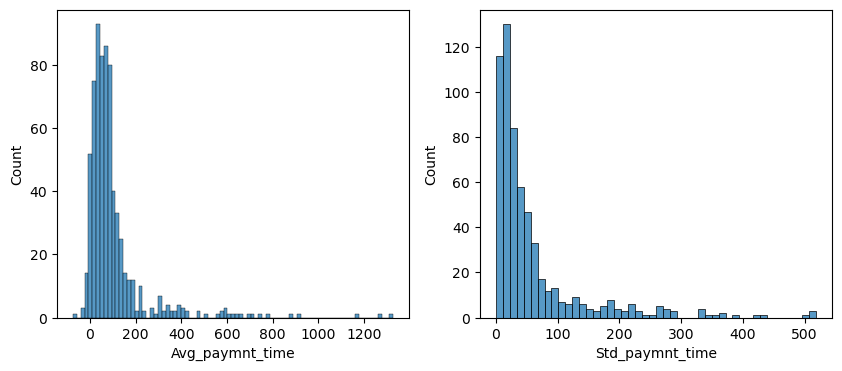

In [2737]:
# let us quikcly try and visulaize the data
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(cust_seg_2['Avg_paymnt_time'])

plt.subplot(1,2,2)
sns.histplot(cust_seg_2['Std_paymnt_time'])

plt.show()

In [ ]:
# let us scale the data to make it on similar scale

In [2739]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler() # instantiate

In [2743]:
cust_seg_2[['Avg_paymnt_time', 'Std_paymnt_time']] = std_scaler.fit_transform(cust_seg_2[['Avg_paymnt_time', 'Std_paymnt_time']])

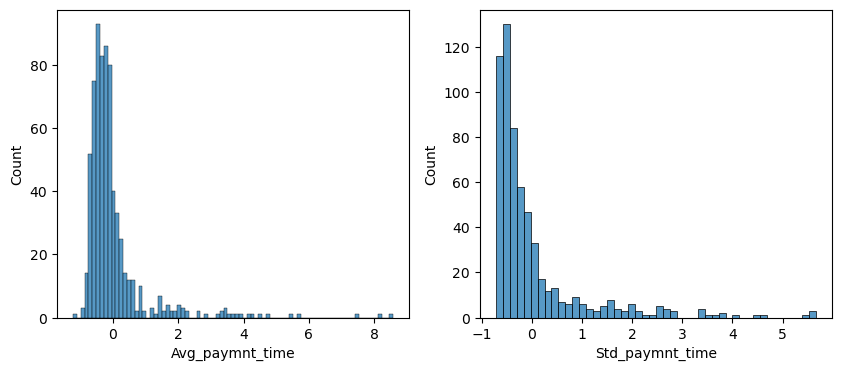

In [2747]:
#lo0king at the distribution again

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(cust_seg_2['Avg_paymnt_time'])

plt.subplot(1,2,2)
sns.histplot(cust_seg_2['Std_paymnt_time'])

plt.show()

In [2749]:
# quickly check for null values if present
cust_seg_2.isna().sum()

CUSTOMER_NAME       0
Avg_paymnt_time     0
Std_paymnt_time    86
dtype: int64

In [2751]:
cust_seg_2.isna().sum()/len(cust_seg_2.index)

CUSTOMER_NAME      0.000000
Avg_paymnt_time    0.000000
Std_paymnt_time    0.124819
dtype: float64

In [2753]:
# Std_paymnt_time has null values although a low perceatge. We will be Replacing the null values for Std deviation for payment with 0
cust_seg_2['Std_paymnt_time'].fillna(0,inplace=True)

In [2755]:
cust_seg_2.isna().sum()/len(cust_seg_2.index)

CUSTOMER_NAME      0.0
Avg_paymnt_time    0.0
Std_paymnt_time    0.0
dtype: float64

In [2757]:
cust_seg_2.head()

,CUSTOMER_NAME,Avg_paymnt_time,Std_paymnt_time
0,3D D Corp,-0.534519,-0.563303
1,6TH Corp,-0.420640,-0.626042
2,A3 D Corp,-0.387513,-0.075683
3,ABC Corp,-0.593276,-0.724119
4,ABDU Corp,-0.167009,-0.046851


In [ ]:
#let us now cluster the customers

In [2759]:
cluster_df = cust_seg_2.copy() # copying the  data for into new dataframe
cluster_df.head()

,CUSTOMER_NAME,Avg_paymnt_time,Std_paymnt_time
0,3D D Corp,-0.534519,-0.563303
1,6TH Corp,-0.420640,-0.626042
2,A3 D Corp,-0.387513,-0.075683
3,ABC Corp,-0.593276,-0.724119
4,ABDU Corp,-0.167009,-0.046851


In [2761]:
#We dont need the customer name for clustering. So lets drop it
cluster_df.drop('CUSTOMER_NAME',axis=1,inplace=True)
cluster_df.head()

,Avg_paymnt_time,Std_paymnt_time
0,-0.534519,-0.563303
1,-0.420640,-0.626042
2,-0.387513,-0.075683
3,-0.593276,-0.724119
4,-0.167009,-0.046851


**Clustering**

In [2763]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

**Hopkins Statistics: The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered. If the value is between {0.01, ...,0.3}, the data is regularly spaced. 
If the value is around 0.5, it is rand. 

If the value is between {0.7, ..., 0.99}, it has a high tendency to cluter.**

In [2765]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [2767]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(cluster_df)

0.9063965670046787

In [1409]:
#Clustering

In [2769]:
# let is do the first iternation with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=42)
kmeans.fit(cluster_df)

KMeans(max_iter=50, n_clusters=4, random_state=42)

In [2771]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 3, 1, 1, 3, 1, 1, 3, 0, 0, 1, 1, 1, 1, 0, 1, 3, 0, 3, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 0, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 3, 3, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       0, 0, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 0, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 0, 3, 1, 1, 1, 3,
       1, 1, 0, 1, 1, 3, 1, 3, 1, 3, 1, 1, 0, 1, 3, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,

In [1417]:
##Finding the Optimal Number of Clusters

**SSD**

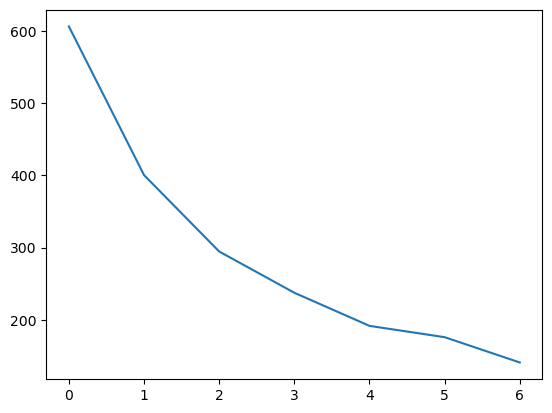

In [2819]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(cluster_df)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

**Silhouette Analysis**

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [2821]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=300)
    kmeans.fit(cluster_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(cluster_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.7557759850933303
For n_clusters=3, the silhouette score is 0.73503646233168
For n_clusters=4, the silhouette score is 0.6097388985555847
For n_clusters=5, the silhouette score is 0.4005723490043799
For n_clusters=6, the silhouette score is 0.40092366084246006
For n_clusters=7, the silhouette score is 0.41348691116819
For n_clusters=8, the silhouette score is 0.41672315363287654


In [2825]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(cluster_df)

KMeans(max_iter=50, n_clusters=3)

In [2827]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [2829]:
centre = kmeans.cluster_centers_
centre

array([[-0.24315182, -0.25539378],
       [ 1.0753206 ,  2.40089147],
       [ 4.66925146,  0.66622853]])

In [2831]:
# assign the label
cust_seg_2['cluster_id'] = kmeans.labels_
cust_seg_2.head()

,CUSTOMER_NAME,Avg_paymnt_time,Std_paymnt_time,cluster_id
0,3D D Corp,-0.534519,-0.563303,0
1,6TH Corp,-0.420640,-0.626042,0
2,A3 D Corp,-0.387513,-0.075683,0
3,ABC Corp,-0.593276,-0.724119,0
4,ABDU Corp,-0.167009,-0.046851,0


In [2833]:
from sklearn.datasets import make_blobs

In [2835]:
cust_seg_2.head()

,CUSTOMER_NAME,Avg_paymnt_time,Std_paymnt_time,cluster_id
0,3D D Corp,-0.534519,-0.563303,0
1,6TH Corp,-0.420640,-0.626042,0
2,A3 D Corp,-0.387513,-0.075683,0
3,ABC Corp,-0.593276,-0.724119,0
4,ABDU Corp,-0.167009,-0.046851,0


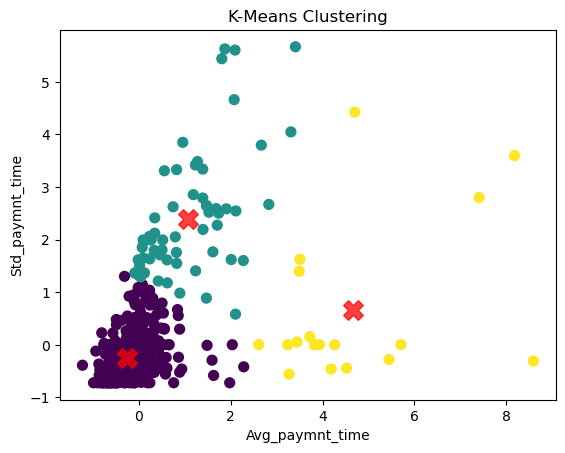

In [2839]:
#let us visualize the clusters by plotting them
X = cust_seg_2[['Avg_paymnt_time', 'Std_paymnt_time']].values
y_kmeans = cust_seg_2['cluster_id'].values
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centroids = np.array([[-0.24315182, -0.25539378],
       [ 1.0753206 ,  2.40089147],
       [ 4.66925146,  0.66622853]])
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-Means Clustering")
plt.xlabel("Avg_paymnt_time")
plt.ylabel("Std_paymnt_time")
plt.show()

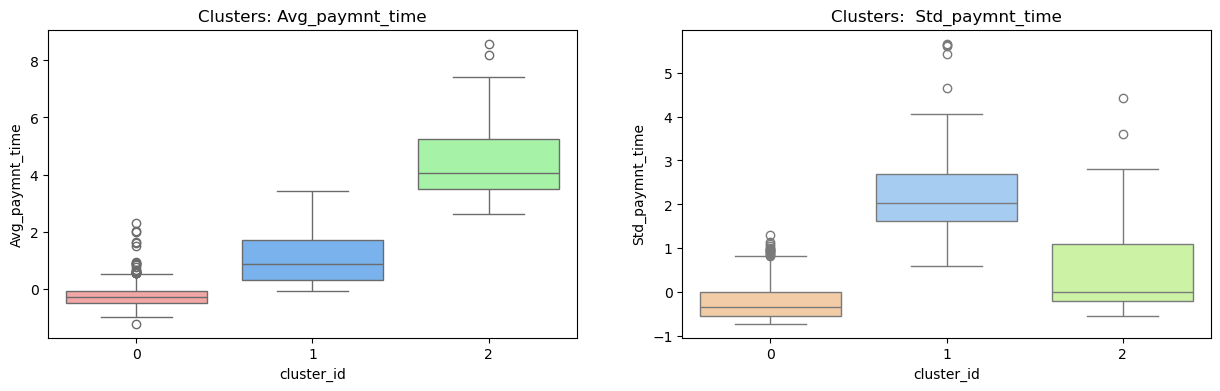

In [2841]:
# Plotting box plot based on clusters

palette1 = ["#FF9999", "#66B2FF", "#99FF99"]
palette2 = ["#FFCC99", "#99CCFF", "#CCFF99"]
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x='cluster_id', y='Avg_paymnt_time', data=cust_seg_2, palette=palette1)
plt.title("Clusters: Avg_paymnt_time")


plt.subplot(1,2,2)
sns.boxplot(x='cluster_id', y='Std_paymnt_time', data=cust_seg_2, palette=palette2)
plt.title("Clusters:  Std_paymnt_time")
plt.show()

In [3289]:
cust_seg_2_1
cust_seg_2_1['cluster_id'] = kmeans.labels_
cust_seg_2_1.head()

,CUSTOMER_NAME,Avg_paymnt_time,Std_paymnt_time,cluster_id
0,3D D Corp,24.395349,13.040449,0
1,6TH Corp,40.666667,7.952987,0
2,A3 D Corp,45.400000,52.581366,0
3,ABC Corp,16.000000,0.000000,0
4,ABDU Corp,76.906250,54.919326,0


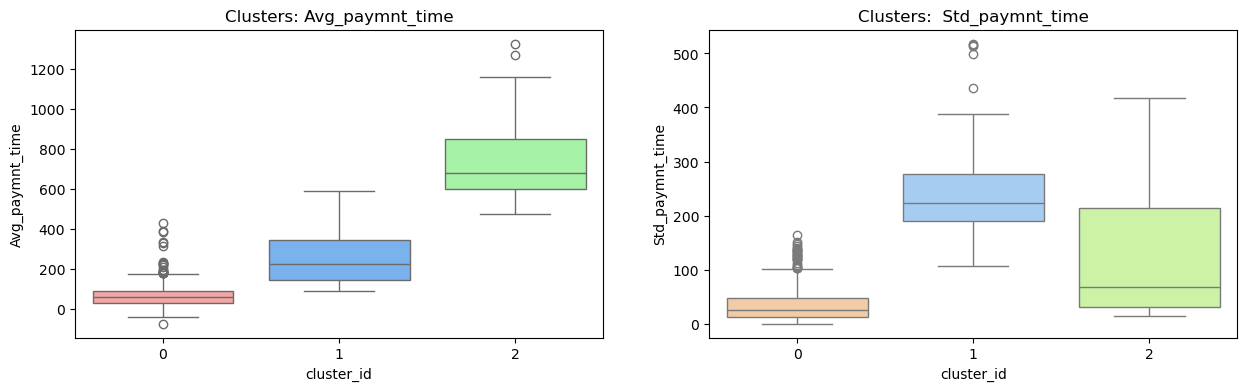

In [3291]:
# Plotting box plot based on clusters

palette1 = ["#FF9999", "#66B2FF", "#99FF99"]
palette2 = ["#FFCC99", "#99CCFF", "#CCFF99"]
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x='cluster_id', y='Avg_paymnt_time', data=cust_seg_2_1, palette=palette1)
plt.title("Clusters: Avg_paymnt_time")


plt.subplot(1,2,2)
sns.boxplot(x='cluster_id', y='Std_paymnt_time', data=cust_seg_2_1, palette=palette2)
plt.title("Clusters:  Std_paymnt_time")
plt.show()

In [3304]:
cust_seg_2_1[cust_seg_2_1['cluster_id']==0].describe()

,Avg_paymnt_time,Std_paymnt_time,cluster_id
count,611.000000,531.000000,611.0
mean,66.026763,34.888592,0.0
std,55.946017,31.819399,0.0
min,-73.369231,0.000000,0.0
25%,29.719565,12.301278,0.0
50%,57.454545,25.596330,0.0
75%,88.933333,47.864940,0.0
max,427.500000,164.196575,0.0


In [3306]:
cust_seg_2_1[cust_seg_2_1['cluster_id']==1].describe()

,Avg_paymnt_time,Std_paymnt_time,cluster_id
count,60.000000,60.000000,60.0
mean,254.413943,253.405798,1.0
std,125.814167,96.638163,0.0
min,88.848592,105.873804,1.0
25%,147.078994,189.626235,1.0
50%,224.190217,222.903536,1.0
75%,342.566333,277.590865,1.0
max,588.243750,518.317279,1.0


In [3308]:
cust_seg_2_1[cust_seg_2_1['cluster_id']==2].describe()

,Avg_paymnt_time,Std_paymnt_time,cluster_id
count,18.000000,12.000000,18.0
mean,767.925253,139.754787,2.0
std,249.405134,142.351701,0.0
min,474.000000,13.435029,2.0
25%,600.525000,30.771591,2.0
50%,681.000000,67.078400,2.0
75%,852.250000,214.269303,2.0
max,1327.333333,417.533186,2.0


Based on the above we see that there are 3 types of customers

In [2843]:
# Merge with open invoice dataset
# dataset to assign cluster id to each customers
cust_seg_2.drop(['Avg_paymnt_time', 'Std_paymnt_time'], axis=1, inplace=True)

In [2845]:
cust_seg_2

,CUSTOMER_NAME,cluster_id
0,3D D Corp,0
1,6TH Corp,0
2,A3 D Corp,0
3,ABC Corp,0
4,ABDU Corp,0
...,...,...
684,YOUS Corp,0
685,ZAHR Corp,0
686,ZAIN Corp,0
687,ZERO Corp,0


In [2847]:
# Creating a copy
customer_clusters = cust_seg_2.copy()

In [2849]:
# Renaming the column to match the case
customer_clusters.rename(columns={'CUSTOMER_NAME':'Customer_Name'}, inplace=True)
customer_clusters.set_index('Customer_Name')

,cluster_id
Customer_Name,
3D D Corp,0
6TH Corp,0
A3 D Corp,0
ABC Corp,0
ABDU Corp,0
...,...
YOUS Corp,0
ZAHR Corp,0
ZAIN Corp,0


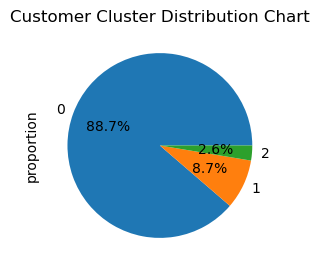

In [2851]:
plt.figure(figsize= (4,3))
(customer_clusters.cluster_id.value_counts(normalize = True)*100).plot.pie(autopct='%1.1f%%')
plt.title("Customer Cluster Distribution Chart")
# labels = ['Early Payment', 'Slight Delayed Payment', 'Delayed payment']
plt.show()

In [2853]:
# Merging payment received dataset and customer_clusters to get the clusters for customer
df_received_cluster = pd.merge(df_received, cust_seg_2, how='inner', on='CUSTOMER_NAME')
df_received_cluster.head()

,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,delayed_payment,Time_to_payment,payment_made_time,Payment_Term_30 Days from EOM,...,RECEIPT_METHOD_CASH,RECEIPT_METHOD_CHEQUE,RECEIPT_METHOD_PDC,RECEIPT_METHOD_WIRE,INVOICE_TYPE_Non Goods,Other_Curr,SAR,USD,actual_payment_made_time,cluster_id
0,C EA Corp,37403,2021-04-20,101018.63040,2020-11-02,2020-12-30,1,58,-111,1,...,0,0,0,1,1,0,0,0,169,0
1,RADW Corp,4003,2021-01-31,48990.21133,2020-12-29,2021-01-28,1,30,-3,0,...,0,0,0,1,1,0,1,0,33,0
2,RADW Corp,4003,2021-01-31,41991.60971,2021-01-30,2021-03-01,0,30,29,0,...,0,0,0,1,1,0,1,0,1,0
3,FARO Corp,1409,2021-01-31,41991.60971,2020-12-15,2021-01-14,1,30,-17,0,...,0,0,0,1,1,0,1,0,47,1
4,RADW Corp,4003,2021-01-31,41991.60971,2020-12-15,2021-01-14,1,30,-17,0,...,0,0,0,1,1,0,1,0,47,0


In [2855]:
# checking null values for clusters
df_received_cluster['cluster_id'].isnull().sum()

0

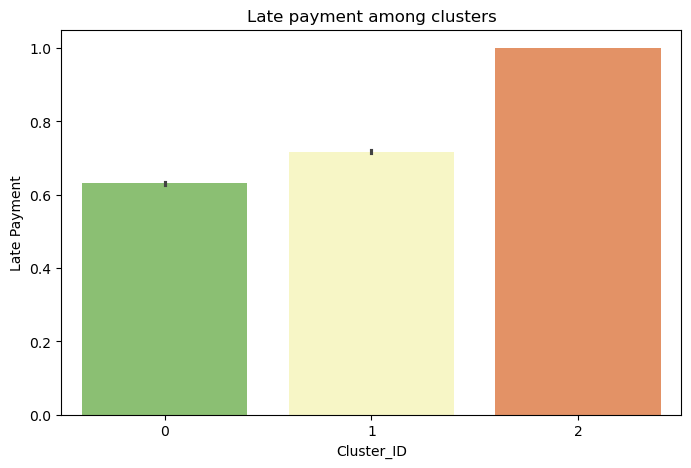

In [3320]:
plt.figure(figsize = (8,5))
sns.barplot(data=df_received_cluster, x='cluster_id', y='delayed_payment', estimator = np.mean, palette='RdYlGn_r')
plt.title("Late payment among clusters")
plt.xlabel("Cluster_ID")
plt.ylabel("Late Payment")
plt.show()

as seen above the delayed payment ratio is highest in cluster 2 followed by cluster 1

In [3313]:
#lets look at the invoice amounts by cluster
df_received_cluster[df_received_cluster['cluster_id'] == 0].describe()

,USD Amount,delayed_payment,Time_to_payment,Payment_Term_30 Days from EOM,Payment_Term_30 Days from Inv Date,Payment_Term_45 Days from EOM,Payment_Term_45 Days from Inv Date,Payment_Term_60 Days from EOM,Payment_Term_60 Days from Inv Date,Payment_Term_90 Days from EOM,Payment_Term_Immediate,Payment_Term_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,Other_Curr,SAR,USD,cluster_id
count,4.381000e+04,43810.000000,43810.000000,43810.000000,43810.000000,43810.000000,43810.000000,43810.000000,43810.000000,43810.000000,43810.000000,43810.000000,43810.000000,43810.000000,43810.000000,43810.000000,43810.000000,43810.0
mean,2.346922e+05,0.630609,43.550034,0.202785,0.241064,0.024606,0.045971,0.077425,0.104908,0.081557,0.142388,0.071879,0.011459,0.941657,0.037206,0.235791,0.255490,0.0
std,3.295216e+05,0.482645,31.329240,0.402078,0.427734,0.154924,0.209425,0.267268,0.306438,0.273691,0.349451,0.258290,0.106431,0.234393,0.189269,0.424497,0.436141,0.0
min,2.132907e+00,0.000000,-360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.507385e+04,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
50%,6.766486e+04,1.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
75%,4.129910e+05,1.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0
max,3.229493e+06,1.000000,365.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [3315]:
df_received_cluster[df_received_cluster['cluster_id'] == 1].describe()

,USD Amount,delayed_payment,Time_to_payment,Payment_Term_30 Days from EOM,Payment_Term_30 Days from Inv Date,Payment_Term_45 Days from EOM,Payment_Term_45 Days from Inv Date,Payment_Term_60 Days from EOM,Payment_Term_60 Days from Inv Date,Payment_Term_90 Days from EOM,Payment_Term_Immediate,Payment_Term_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,Other_Curr,SAR,USD,cluster_id
count,4.883600e+04,48836.000000,48836.000000,48836.000000,48836.000000,48836.000000,48836.000000,48836.000000,48836.000000,48836.000000,48836.000000,48836.000000,48836.000000,48836.000000,48836.000000,48836.000000,48836.000000,48836.0
mean,8.111164e+05,0.716930,46.656524,0.049472,0.070767,0.056372,0.031370,0.186727,0.308297,0.006553,0.119236,0.024203,0.001024,0.939778,0.044414,0.575723,0.145221,1.0
std,1.215400e+06,0.450495,37.959838,0.216853,0.256439,0.230642,0.174318,0.389696,0.461795,0.080683,0.324069,0.153682,0.031981,0.237900,0.206015,0.494238,0.352327,0.0
min,1.287743e+00,0.000000,-3622.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1.078496e+05,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
50%,4.197897e+05,1.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.0
75%,9.186669e+05,1.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.0
max,1.084983e+07,1.000000,304.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [3317]:
df_received_cluster[df_received_cluster['cluster_id'] == 2].describe()

,USD Amount,delayed_payment,Time_to_payment,Payment_Term_30 Days from EOM,Payment_Term_30 Days from Inv Date,Payment_Term_45 Days from EOM,Payment_Term_45 Days from Inv Date,Payment_Term_60 Days from EOM,Payment_Term_60 Days from Inv Date,Payment_Term_90 Days from EOM,Payment_Term_Immediate,Payment_Term_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,Other_Curr,SAR,USD,cluster_id
count,165.000000,165.0,165.000000,165.000000,165.000000,165.0,165.000000,165.000000,165.000000,165.0,165.000000,165.000000,165.0,165.000000,165.000000,165.000000,165.000000,165.0
mean,35865.255401,1.0,50.175758,0.006061,0.030303,0.0,0.024242,0.006061,0.545455,0.0,0.054545,0.157576,0.0,0.993939,0.078788,0.272727,0.630303,2.0
std,37593.230019,0.0,17.257007,0.077850,0.171942,0.0,0.154269,0.077850,0.499445,0.0,0.227782,0.365452,0.0,0.077850,0.270228,0.446718,0.484192,0.0
min,5.065655,1.0,-1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.0
25%,3735.250000,1.0,38.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,2.0
50%,26661.339500,1.0,60.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,2.0
75%,95151.110000,1.0,60.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,1.000000,2.0
max,127325.554800,1.0,90.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,2.0


**Lets now start with the steps for Model Building**

In [2859]:
df_received_cluster.columns

Index(['CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE', 'USD Amount',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'delayed_payment',
       'Time_to_payment', 'payment_made_time', 'Payment_Term_30 Days from EOM',
       'Payment_Term_30 Days from Inv Date', 'Payment_Term_45 Days from EOM',
       'Payment_Term_45 Days from Inv Date', 'Payment_Term_60 Days from EOM',
       'Payment_Term_60 Days from Inv Date', 'Payment_Term_90 Days from EOM',
       'Payment_Term_Immediate', 'Payment_Term_Others', 'INVOICE_CLASS_DM',
       'INVOICE_CLASS_INV', 'RECEIPT_METHOD_CASH', 'RECEIPT_METHOD_CHEQUE',
       'RECEIPT_METHOD_PDC', 'RECEIPT_METHOD_WIRE', 'INVOICE_TYPE_Non Goods',
       'Other_Curr', 'SAR', 'USD', 'actual_payment_made_time', 'cluster_id'],
      dtype='object')

In [2861]:
df_received_cluster.shape

(92811, 30)

In [2863]:
df_open_invoice.columns

Index(['Customer_Name', 'Due Date', 'AGE', 'USD Amount', 'INV_CREATION_DATE',
       'Payment_Term_30 Days from EOM', 'Payment_Term_30 Days from Inv Date',
       'Payment_Term_45 Days from EOM', 'Payment_Term_45 Days from Inv Date',
       'Payment_Term_60 Days from EOM', 'Payment_Term_60 Days from Inv Date',
       'Payment_Term_90 Days from EOM', 'Payment_Term_Immediate',
       'Payment_Term_Others', 'Time_to_payment', 'INVOICE_CLASS_DM',
       'INVOICE_CLASS_INV', 'Other_Curr', 'SAR', 'USD'],
      dtype='object')

* let us delete the following variables from both datasets
* Customer_Name
* CUSTOMER_NUMBER
* Due Date
* RECEIPT_DATE
* INV_CREATION_DATE


In [2865]:
df_received_cluster.drop(['CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE','INVOICE_CREATION_DATE', 'DUE_DATE'], axis = 1, inplace = True)

In [2867]:
df_received_cluster.columns

Index(['USD Amount', 'delayed_payment', 'Time_to_payment', 'payment_made_time',
       'Payment_Term_30 Days from EOM', 'Payment_Term_30 Days from Inv Date',
       'Payment_Term_45 Days from EOM', 'Payment_Term_45 Days from Inv Date',
       'Payment_Term_60 Days from EOM', 'Payment_Term_60 Days from Inv Date',
       'Payment_Term_90 Days from EOM', 'Payment_Term_Immediate',
       'Payment_Term_Others', 'INVOICE_CLASS_DM', 'INVOICE_CLASS_INV',
       'RECEIPT_METHOD_CASH', 'RECEIPT_METHOD_CHEQUE', 'RECEIPT_METHOD_PDC',
       'RECEIPT_METHOD_WIRE', 'INVOICE_TYPE_Non Goods', 'Other_Curr', 'SAR',
       'USD', 'actual_payment_made_time', 'cluster_id'],
      dtype='object')

In [2869]:
# will drop the following from the open invoice data. Before that we will filter only for those customers whose AGE value is negative.

df_open_invoice_aged = df_open_invoice[df_open_invoice['AGE'] < 0]

In [2871]:
df_open_invoice_aged.drop(['Customer_Name', 'Due Date', 'AGE', 'INV_CREATION_DATE'], inplace = True, axis = 1)

In [2873]:
df_open_invoice_aged.columns

Index(['USD Amount', 'Payment_Term_30 Days from EOM',
       'Payment_Term_30 Days from Inv Date', 'Payment_Term_45 Days from EOM',
       'Payment_Term_45 Days from Inv Date', 'Payment_Term_60 Days from EOM',
       'Payment_Term_60 Days from Inv Date', 'Payment_Term_90 Days from EOM',
       'Payment_Term_Immediate', 'Payment_Term_Others', 'Time_to_payment',
       'INVOICE_CLASS_DM', 'INVOICE_CLASS_INV', 'Other_Curr', 'SAR', 'USD'],
      dtype='object')

In [1543]:
#let also delete the columns that are only in the received dataset. since we have to apply the model on the open invoice data

In [2875]:
df_received_cluster.columns

Index(['USD Amount', 'delayed_payment', 'Time_to_payment', 'payment_made_time',
       'Payment_Term_30 Days from EOM', 'Payment_Term_30 Days from Inv Date',
       'Payment_Term_45 Days from EOM', 'Payment_Term_45 Days from Inv Date',
       'Payment_Term_60 Days from EOM', 'Payment_Term_60 Days from Inv Date',
       'Payment_Term_90 Days from EOM', 'Payment_Term_Immediate',
       'Payment_Term_Others', 'INVOICE_CLASS_DM', 'INVOICE_CLASS_INV',
       'RECEIPT_METHOD_CASH', 'RECEIPT_METHOD_CHEQUE', 'RECEIPT_METHOD_PDC',
       'RECEIPT_METHOD_WIRE', 'INVOICE_TYPE_Non Goods', 'Other_Curr', 'SAR',
       'USD', 'actual_payment_made_time', 'cluster_id'],
      dtype='object')

In [2877]:
df_received_cluster.drop(['RECEIPT_METHOD_CASH', 'RECEIPT_METHOD_CHEQUE', 'RECEIPT_METHOD_PDC','RECEIPT_METHOD_WIRE','INVOICE_TYPE_Non Goods','payment_made_time', 'actual_payment_made_time'], axis = 1, inplace = True)

In [2879]:
list(df_received_cluster.columns)

['USD Amount',
 'delayed_payment',
 'Time_to_payment',
 'Payment_Term_30 Days from EOM',
 'Payment_Term_30 Days from Inv Date',
 'Payment_Term_45 Days from EOM',
 'Payment_Term_45 Days from Inv Date',
 'Payment_Term_60 Days from EOM',
 'Payment_Term_60 Days from Inv Date',
 'Payment_Term_90 Days from EOM',
 'Payment_Term_Immediate',
 'Payment_Term_Others',
 'INVOICE_CLASS_DM',
 'INVOICE_CLASS_INV',
 'Other_Curr',
 'SAR',
 'USD',
 'cluster_id']

In [2881]:
list(df_open_invoice_aged.columns)

['USD Amount',
 'Payment_Term_30 Days from EOM',
 'Payment_Term_30 Days from Inv Date',
 'Payment_Term_45 Days from EOM',
 'Payment_Term_45 Days from Inv Date',
 'Payment_Term_60 Days from EOM',
 'Payment_Term_60 Days from Inv Date',
 'Payment_Term_90 Days from EOM',
 'Payment_Term_Immediate',
 'Payment_Term_Others',
 'Time_to_payment',
 'INVOICE_CLASS_DM',
 'INVOICE_CLASS_INV',
 'Other_Curr',
 'SAR',
 'USD']

In [2883]:
len(df_open_invoice_aged.columns), len(df_received_cluster.columns)

(16, 18)

In [2885]:
#train test split
from sklearn.model_selection import train_test_split
# Feature variables X
X = df_received_cluster.drop(['delayed_payment'], axis = 1)
X.head()

,USD Amount,Time_to_payment,Payment_Term_30 Days from EOM,Payment_Term_30 Days from Inv Date,Payment_Term_45 Days from EOM,Payment_Term_45 Days from Inv Date,Payment_Term_60 Days from EOM,Payment_Term_60 Days from Inv Date,Payment_Term_90 Days from EOM,Payment_Term_Immediate,Payment_Term_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,Other_Curr,SAR,USD,cluster_id
0,101018.63040,58,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,48990.21133,30,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
2,41991.60971,30,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
3,41991.60971,30,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
4,41991.60971,30,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0


In [2887]:
y  = df_received_cluster['delayed_payment']
y.head()

0    1
1    1
2    0
3    1
4    1
Name: delayed_payment, dtype: int64

In [2889]:
# Splitting into train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,stratify=y, random_state= 100)
X_train.head()

,USD Amount,Time_to_payment,Payment_Term_30 Days from EOM,Payment_Term_30 Days from Inv Date,Payment_Term_45 Days from EOM,Payment_Term_45 Days from Inv Date,Payment_Term_60 Days from EOM,Payment_Term_60 Days from Inv Date,Payment_Term_90 Days from EOM,Payment_Term_Immediate,Payment_Term_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,Other_Curr,SAR,USD,cluster_id
56555,2.063485e+06,81,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
45072,6.142716e+05,32,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1
72563,1.711108e+05,38,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
32369,2.585056e+05,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
33602,9.364310e+04,35,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [2891]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((64967, 17), (27844, 17), (64967,), (27844,))

In [2893]:
df_received.shape

(92811, 29)

In [2895]:
X_train.describe()

#Let us scale the USD amounts and time to payment

,USD Amount,Time_to_payment,Payment_Term_30 Days from EOM,Payment_Term_30 Days from Inv Date,Payment_Term_45 Days from EOM,Payment_Term_45 Days from Inv Date,Payment_Term_60 Days from EOM,Payment_Term_60 Days from Inv Date,Payment_Term_90 Days from EOM,Payment_Term_Immediate,Payment_Term_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,Other_Curr,SAR,USD,cluster_id
count,6.496700e+04,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.00000,64967.000000
mean,5.412456e+05,45.093016,0.121400,0.150630,0.040821,0.038266,0.133391,0.214078,0.041359,0.131051,0.047809,0.005834,0.939723,0.040159,0.414934,0.19827,0.531916
std,9.609943e+05,34.897274,0.326594,0.357691,0.197876,0.191838,0.339999,0.410184,0.199122,0.337459,0.213363,0.076156,0.238001,0.196333,0.492714,0.39870,0.502642
min,1.287743e+00,-3622.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,4.061215e+04,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000
50%,1.905949e+05,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000
75%,6.021227e+05,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,1.000000
max,1.084983e+07,365.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,2.000000


In [2897]:
X_train[['USD Amount','Time_to_payment']] = std_scaler.fit_transform(X_train[['USD Amount','Time_to_payment']])

In [2899]:
X_train.head()

,USD Amount,Time_to_payment,Payment_Term_30 Days from EOM,Payment_Term_30 Days from Inv Date,Payment_Term_45 Days from EOM,Payment_Term_45 Days from Inv Date,Payment_Term_60 Days from EOM,Payment_Term_60 Days from Inv Date,Payment_Term_90 Days from EOM,Payment_Term_Immediate,Payment_Term_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,Other_Curr,SAR,USD,cluster_id
56555,1.584038,1.028942,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
45072,0.075991,-0.375190,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1
72563,-0.385161,-0.203256,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
32369,-0.294218,-1.292174,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
33602,-0.465774,-0.289223,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


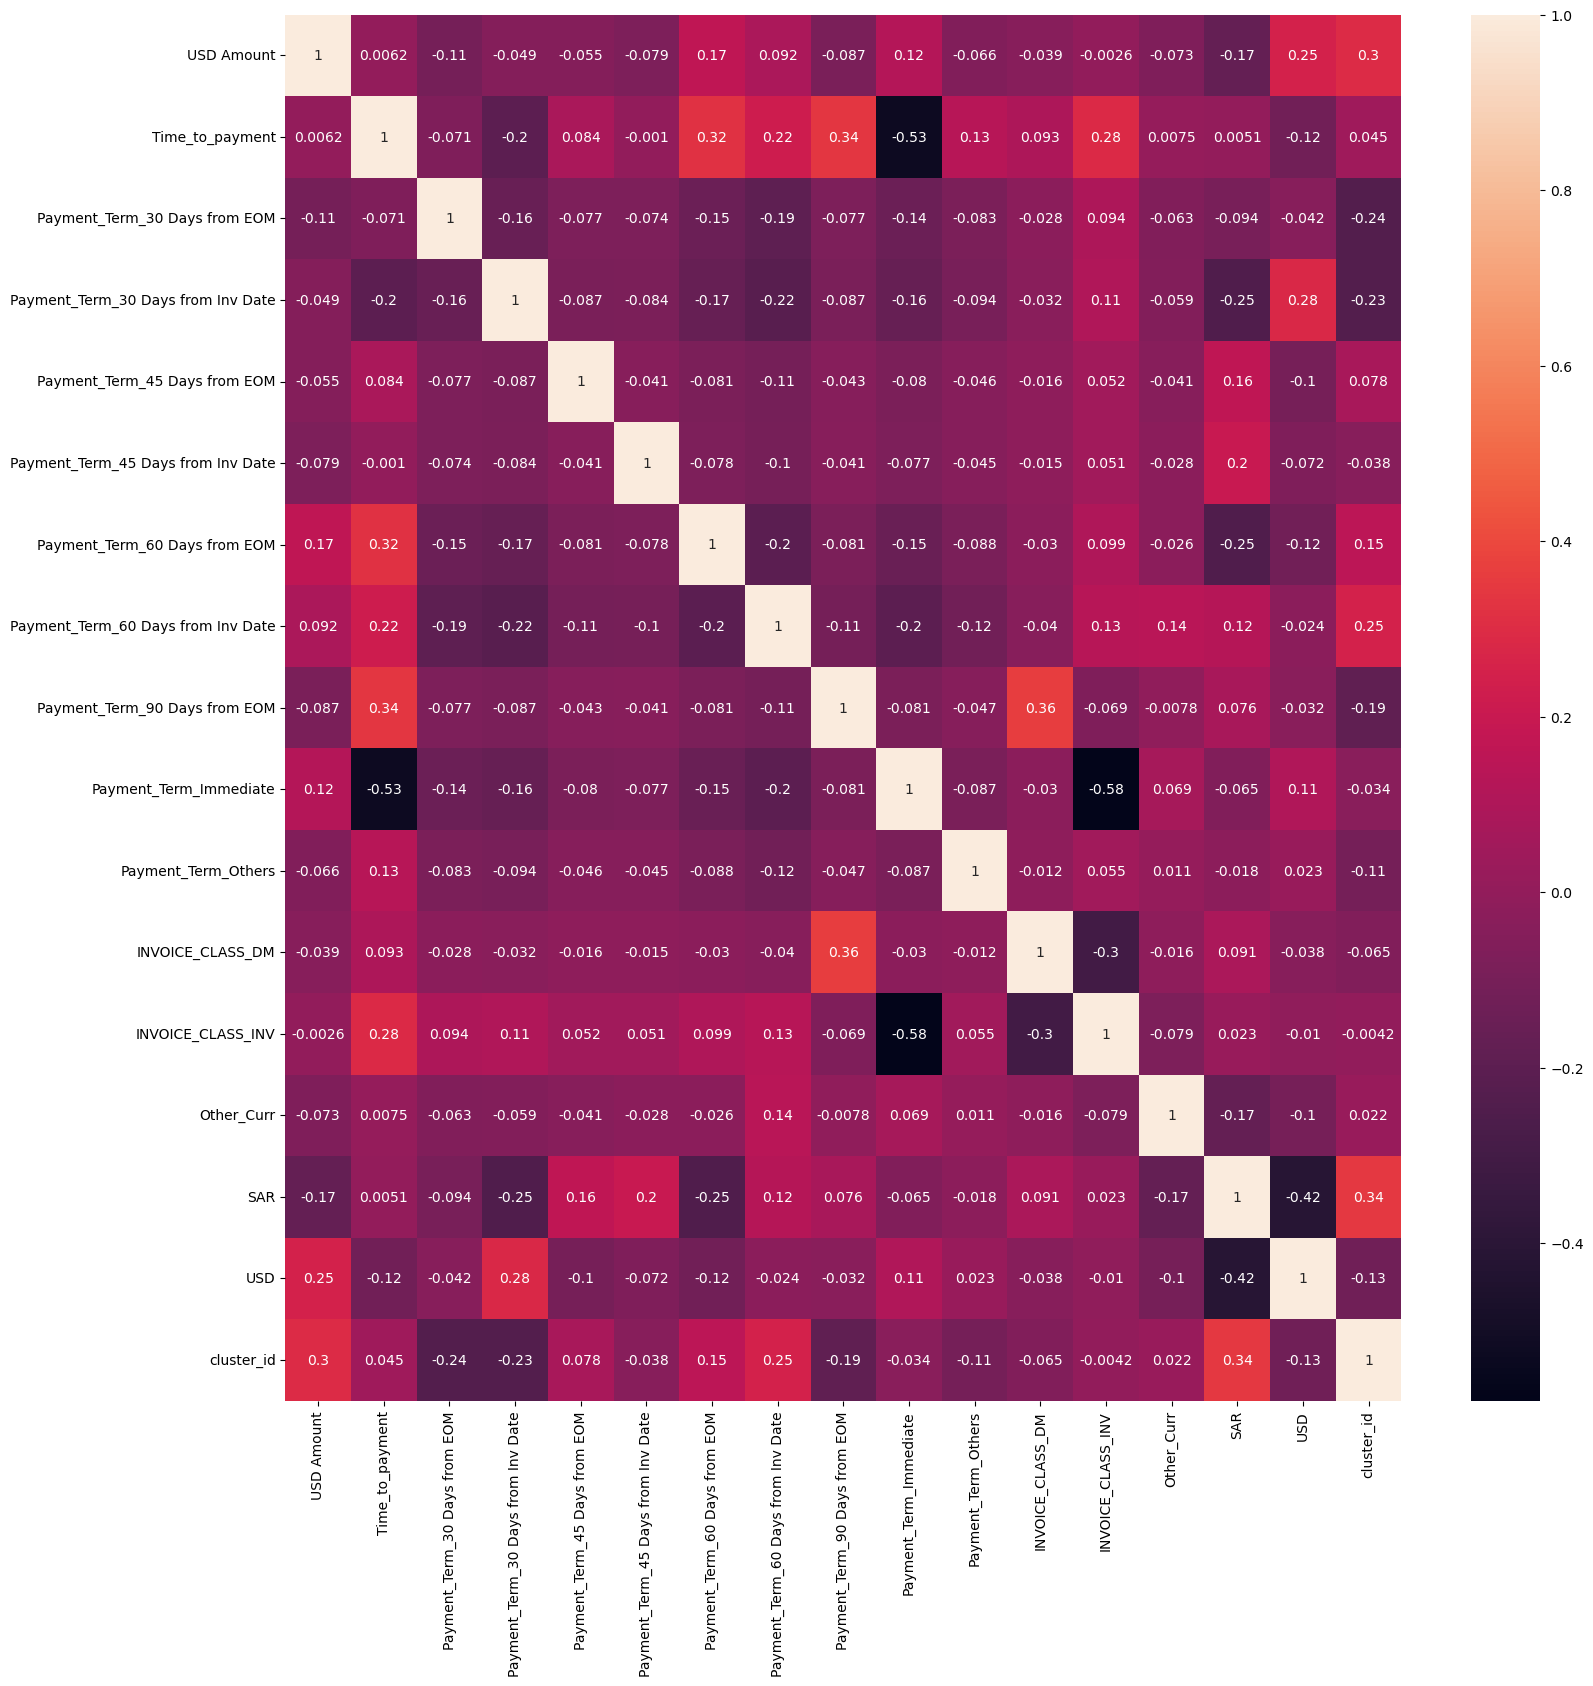

In [2901]:
# lets check for corelation 
plt.figure(figsize=(18,18))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

In [ ]:
#data looks ok to proceed. No variables seem to be highly collinear with each other

## Modelling

In [2903]:
#import the required packages

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score # For Classificiation
from sklearn.metrics import precision_recall_curve # Precision Recall Curve
from sklearn.metrics import roc_auc_score,roc_curve # For AUC-ROC Curve

X_train_sm = sm.add_constant(X_train)
log_1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result=log_1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        delayed_payment   No. Observations:                64967
Model:                            GLM   Df Residuals:                    64949
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29446.
Date:                Mon, 09 Sep 2024   Deviance:                       58891.
Time:                        21:53:07   Pearson chi2:                 6.31e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2969
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  4.1626      0.182     22.869      0.000       3.806       4.519
USD Amount                            -0.1509      0.012    -12.563      0.000      -0.174      -0.127
Time_to_payment                       -0.4520      0.033    -13.865      0.000      -0.516      -0.388
Payment_Term_30 Days from EOM         -4.6202      0.107    -42.984      0.000      -4.831      -4.410
Payment_Term_30 Days from Inv Date    -2.1806      0.108    -20.186      0.000      -2.392      -1.969
Payment_Term_45 Days from EOM         -1.2674      0.124    -10.224      0.000      -1.510      -1.024
Payment_Term_45 Days from Inv Date    -2.7611      0.113    -24.464      0.000      -2.982      -2.540
Payment_Term_60 Days from EOM         -3.9304      0.114    -34.495      0.000      -4.154      -3.707
Payment_Term_60 Days from Inv Date    -2.2420      0.108    -20.712      0.000      -2.454      -2.030
Payment_Term_90 Days from EOM         -2.1278      0.133    -16.027      0.000      -2.388      -1.868
Payment_Term_Immediate                -0.9457      0.128     -7.369      0.000      -1.197      -0.694
Payment_Term_Others                   -2.6486      0.117    -22.659      0.000      -2.878      -2.419
INVOICE_CLASS_DM                       0.2426      0.227      1.067      0.286      -0.203       0.688
INVOICE_CLASS_INV                     -1.0119      0.147     -6.900      0.000      -1.299      -0.724
Other_Curr                            -0.6337      0.051    -12.318      0.000      -0.734      -0.533
SAR                                    0.3128      0.029     10.825      0.000       0.256       0.369
USD                                    0.4519      0.030     14.983      0.000       0.393       0.511
cluster_id                             0.2717      0.027     10.250      0.000       0.220       0.324
======================================================================================================
"""

In [2905]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,INVOICE_CLASS_INV,12.25
14,SAR,3.46
16,cluster_id,3.36
7,Payment_Term_60 Days from Inv Date,3.32
6,Payment_Term_60 Days from EOM,2.94
3,Payment_Term_30 Days from Inv Date,2.74
1,Time_to_payment,2.25
2,Payment_Term_30 Days from EOM,2.24
8,Payment_Term_90 Days from EOM,1.96
9,Payment_Term_Immediate,1.93


In [2907]:
#drop the feature 'INVOICE_CLASS_INV' and run the model again
X_train = X_train.drop(['INVOICE_CLASS_INV'], axis = 1)
X_train.head()

,USD Amount,Time_to_payment,Payment_Term_30 Days from EOM,Payment_Term_30 Days from Inv Date,Payment_Term_45 Days from EOM,Payment_Term_45 Days from Inv Date,Payment_Term_60 Days from EOM,Payment_Term_60 Days from Inv Date,Payment_Term_90 Days from EOM,Payment_Term_Immediate,Payment_Term_Others,INVOICE_CLASS_DM,Other_Curr,SAR,USD,cluster_id
56555,1.584038,1.028942,0,0,0,0,1,0,0,0,0,0,0,0,0,1
45072,0.075991,-0.375190,1,0,0,0,0,0,0,0,0,0,0,1,0,1
72563,-0.385161,-0.203256,1,0,0,0,0,0,0,0,0,0,0,0,0,0
32369,-0.294218,-1.292174,0,0,0,0,0,0,0,1,0,0,0,0,1,1
33602,-0.465774,-0.289223,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [2970]:
X_train_sm = sm.add_constant(X_train)
log_2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result=log_2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        delayed_payment   No. Observations:                64967
Model:                            GLM   Df Residuals:                    64950
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29473.
Date:                Mon, 09 Sep 2024   Deviance:                       58947.
Time:                        22:00:42   Pearson chi2:                 6.34e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2963
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  3.1475      0.107     29.334      0.000       2.937       3.358
USD Amount                            -0.1561      0.012    -12.907      0.000      -0.180      -0.132
Time_to_payment                       -0.4525      0.033    -13.888      0.000      -0.516      -0.389
Payment_Term_30 Days from EOM         -4.6174      0.107    -42.961      0.000      -4.828      -4.407
Payment_Term_30 Days from Inv Date    -2.1770      0.108    -20.154      0.000      -2.389      -1.965
Payment_Term_45 Days from EOM         -1.2661      0.124    -10.213      0.000      -1.509      -1.023
Payment_Term_45 Days from Inv Date    -2.7570      0.113    -24.427      0.000      -2.978      -2.536
Payment_Term_60 Days from EOM         -3.9305      0.114    -34.496      0.000      -4.154      -3.707
Payment_Term_60 Days from Inv Date    -2.2407      0.108    -20.701      0.000      -2.453      -2.029
Payment_Term_90 Days from EOM         -2.1223      0.133    -15.988      0.000      -2.382      -1.862
Payment_Term_Immediate                -0.6263      0.124     -5.052      0.000      -0.869      -0.383
Payment_Term_Others                   -2.6452      0.117    -22.630      0.000      -2.874      -2.416
INVOICE_CLASS_DM                       1.2565      0.174      7.236      0.000       0.916       1.597
Other_Curr                            -0.6256      0.051    -12.216      0.000      -0.726      -0.525
SAR                                    0.3056      0.029     10.573      0.000       0.249       0.362
USD                                    0.4460      0.030     14.798      0.000       0.387       0.505
cluster_id                             0.2808      0.026     10.603      0.000       0.229       0.333
======================================================================================================
"""

In [2972]:
#Check VIF again
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,cluster_id,3.23
13,SAR,2.98
1,Time_to_payment,2.23
7,Payment_Term_60 Days from Inv Date,1.90
9,Payment_Term_Immediate,1.77
14,USD,1.76
8,Payment_Term_90 Days from EOM,1.57
6,Payment_Term_60 Days from EOM,1.56
3,Payment_Term_30 Days from Inv Date,1.42
0,USD Amount,1.30


All variables have a good value of VIF. So proceed with making predictions using this model only

In [2914]:
# We have 16 feature.let is try Feature Selection Using RFE

In [2916]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [2918]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [2920]:
rfe.support_

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [2922]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('USD Amount', False, 2),
 ('Time_to_payment', True, 1),
 ('Payment_Term_30 Days from EOM', True, 1),
 ('Payment_Term_30 Days from Inv Date', True, 1),
 ('Payment_Term_45 Days from EOM', True, 1),
 ('Payment_Term_45 Days from Inv Date', True, 1),
 ('Payment_Term_60 Days from EOM', True, 1),
 ('Payment_Term_60 Days from Inv Date', True, 1),
 ('Payment_Term_90 Days from EOM', True, 1),
 ('Payment_Term_Immediate', True, 1),
 ('Payment_Term_Others', True, 1),
 ('INVOICE_CLASS_DM', True, 1),
 ('Other_Curr', True, 1),
 ('SAR', True, 1),
 ('USD', True, 1),
 ('cluster_id', True, 1)]

In [2924]:
col = X_train.columns[rfe.support_]
col

Index(['Time_to_payment', 'Payment_Term_30 Days from EOM',
       'Payment_Term_30 Days from Inv Date', 'Payment_Term_45 Days from EOM',
       'Payment_Term_45 Days from Inv Date', 'Payment_Term_60 Days from EOM',
       'Payment_Term_60 Days from Inv Date', 'Payment_Term_90 Days from EOM',
       'Payment_Term_Immediate', 'Payment_Term_Others', 'INVOICE_CLASS_DM',
       'Other_Curr', 'SAR', 'USD', 'cluster_id'],
      dtype='object')

In [2926]:
X_train.columns[~rfe.support_]

Index(['USD Amount'], dtype='object')

In [ ]:
#lets drop USD amount and see how the model performs

In [2928]:
X_train_no_USD = X_train.drop(['USD Amount'], axis = 1)
X_train_no_USD.head()

,Time_to_payment,Payment_Term_30 Days from EOM,Payment_Term_30 Days from Inv Date,Payment_Term_45 Days from EOM,Payment_Term_45 Days from Inv Date,Payment_Term_60 Days from EOM,Payment_Term_60 Days from Inv Date,Payment_Term_90 Days from EOM,Payment_Term_Immediate,Payment_Term_Others,INVOICE_CLASS_DM,Other_Curr,SAR,USD,cluster_id
56555,1.028942,0,0,0,0,1,0,0,0,0,0,0,0,0,1
45072,-0.375190,1,0,0,0,0,0,0,0,0,0,0,1,0,1
72563,-0.203256,1,0,0,0,0,0,0,0,0,0,0,0,0,0
32369,-1.292174,0,0,0,0,0,0,0,1,0,0,0,0,1,1
33602,-0.289223,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [2930]:
X_train_sm_no_USD = sm.add_constant(X_train_no_USD)
log_3 = sm.GLM(y_train,X_train_sm_no_USD, family = sm.families.Binomial())
result=log_3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        delayed_payment   No. Observations:                64967
Model:                            GLM   Df Residuals:                    64951
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29554.
Date:                Mon, 09 Sep 2024   Deviance:                       59109.
Time:                        21:54:12   Pearson chi2:                 6.30e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2945
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  3.2345      0.107     30.208      0.000       3.025       3.444
Time_to_payment                       -0.4557      0.032    -14.034      0.000      -0.519      -0.392
Payment_Term_30 Days from EOM         -4.6437      0.107    -43.216      0.000      -4.854      -4.433
Payment_Term_30 Days from Inv Date    -2.2082      0.108    -20.454      0.000      -2.420      -1.997
Payment_Term_45 Days from EOM         -1.2810      0.124    -10.336      0.000      -1.524      -1.038
Payment_Term_45 Days from Inv Date    -2.7849      0.113    -24.688      0.000      -3.006      -2.564
Payment_Term_60 Days from EOM         -4.0054      0.114    -35.203      0.000      -4.228      -3.782
Payment_Term_60 Days from Inv Date    -2.3074      0.108    -21.349      0.000      -2.519      -2.096
Payment_Term_90 Days from EOM         -2.1548      0.133    -16.256      0.000      -2.415      -1.895
Payment_Term_Immediate                -0.7357      0.124     -5.957      0.000      -0.978      -0.494
Payment_Term_Others                   -2.6712      0.117    -22.880      0.000      -2.900      -2.442
INVOICE_CLASS_DM                       1.2449      0.174      7.171      0.000       0.905       1.585
Other_Curr                            -0.5377      0.051    -10.627      0.000      -0.637      -0.439
SAR                                    0.3554      0.029     12.470      0.000       0.300       0.411
USD                                    0.3942      0.030     13.215      0.000       0.336       0.453
cluster_id                             0.1843      0.025      7.304      0.000       0.135       0.234
======================================================================================================
"""

In [2932]:
#Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train_no_USD.columns
vif['VIF'] = [variance_inflation_factor(X_train_no_USD.values, i) for i in range(X_train_no_USD.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,cluster_id,2.94
12,SAR,2.81
0,Time_to_payment,2.22
6,Payment_Term_60 Days from Inv Date,1.90
8,Payment_Term_Immediate,1.76
13,USD,1.72
5,Payment_Term_60 Days from EOM,1.56
7,Payment_Term_90 Days from EOM,1.56
2,Payment_Term_30 Days from Inv Date,1.39
3,Payment_Term_45 Days from EOM,1.17


In [ ]:
#lets check the AUC score with no USD

In [2934]:
# Predicted values for train set
y_train_pred_no_USD = result.predict(X_train_sm_no_USD)
y_train_pred_no_USD[:10]

56555    0.258174
45072    0.332121
72563    0.211377
32369    0.975060
33602    0.980275
80245    0.666422
13134    0.816852
12116    0.252923
72753    0.220215
10023    0.544869
dtype: float64

In [2936]:
# predicted values
y_pred = pd.DataFrame({'delayed_payment':y_train.values, 'delayed_payment_pred_%':y_train_pred_no_USD})
y_pred.head()

,delayed_payment,delayed_payment_pred_%
56555,0,0.258174
45072,0,0.332121
72563,0,0.211377
32369,1,0.975060
33602,1,0.980275


In [2938]:
#applying cutoff of 0.5

y_pred['log_pred'] = y_pred['delayed_payment_pred_%'].map(lambda x:1 if x>0.5 else 0)
y_pred.head(10)

,delayed_payment,delayed_payment_pred_%,log_pred
56555,0,0.258174,0
45072,0,0.332121,0
72563,0,0.211377,0
32369,1,0.975060,1
33602,1,0.980275,1
80245,1,0.666422,1
13134,1,0.816852,1
12116,1,0.252923,0
72753,0,0.220215,0
10023,1,0.544869,1


In [2940]:
# Confusion Matrix
confusion = confusion_matrix(y_pred.delayed_payment, y_pred.log_pred)
confusion

array([[12713,  8292],
       [ 4803, 39159]], dtype=int64)

In [2942]:
fpr, tpr, thresholds = roc_curve(y_pred.delayed_payment, y_pred.log_pred, drop_intermediate = False )

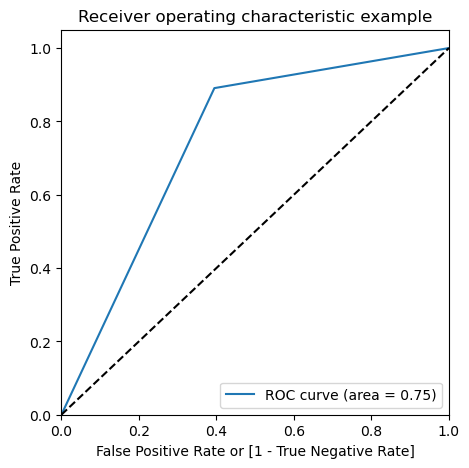

In [2944]:
draw_roc(y_pred.delayed_payment, y_pred.log_pred)

**the AUC score does not change. hence no point is dropping USD. Let us go back tom the previus model. i.e model 2**

In [2974]:
# Predicted values for train set
y_train_pred = result.predict(X_train_sm)
y_train_pred[:10]

56555    0.228810
45072    0.326158
72563    0.211174
32369    0.979738
33602    0.980876
80245    0.658864
13134    0.859164
12116    0.267914
72753    0.224531
10023    0.554019
dtype: float64

In [2976]:
# predicted values
y_pred = pd.DataFrame({'delayed_payment':y_train.values, 'delayed_payment_pred_%':y_train_pred})
y_pred.head()

,delayed_payment,delayed_payment_pred_%
56555,0,0.228810
45072,0,0.326158
72563,0,0.211174
32369,1,0.979738
33602,1,0.980876


In [2978]:
#let us create a the prediction based on an initial cutoff of 0.5

y_pred['log_pred'] = y_pred['delayed_payment_pred_%'].map(lambda x:1 if x>0.5 else 0)
y_pred.head(10)

,delayed_payment,delayed_payment_pred_%,log_pred
56555,0,0.228810,0
45072,0,0.326158,0
72563,0,0.211174,0
32369,1,0.979738,1
33602,1,0.980876,1
80245,1,0.658864,1
13134,1,0.859164,1
12116,1,0.267914,0
72753,0,0.224531,0
10023,1,0.554019,1


In [2980]:
# Confusion Matrix
confusion = confusion_matrix(y_pred.delayed_payment, y_pred.log_pred)
confusion

array([[12667,  8338],
       [ 4747, 39215]], dtype=int64)

In [2982]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [2984]:
# Accuracy of our LR model
print("Accuracy= ", accuracy_score(y_pred.delayed_payment, y_pred.log_pred))

# Let's Calculate the Sensitivity of our logistic regression model
print("Sensitivity= ", TP / float(TP+FN))

# Let us calculate Specificity of our logistic regression model
print("Specificity= ", TN / float(TN+FP))

# Let us calculate False Postive rate of our logistic regression model
print("False Postive Rate= ",FP/ float(TN+FP))

# Let us calculate Positive Predictive value of our logistic regression model
print ("Positive Predictive value= ", TP / float(TP+FP))

# Let us calculate Negative predictive value of our logistic regression model
print ("Negative predictive value= ", TN / float(TN+ FN))

Accuracy=  0.7985900534117321
Sensitivity=  0.8920203812383422
Specificity=  0.6030468935967627
False Postive Rate=  0.39695310640323733
Positive Predictive value=  0.8246588017580384
Negative predictive value=  0.7274032387734007


Plotting the ROC Curve

In [2986]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [2988]:
fpr, tpr, thresholds = roc_curve(y_pred.delayed_payment, y_pred.log_pred, drop_intermediate = False )

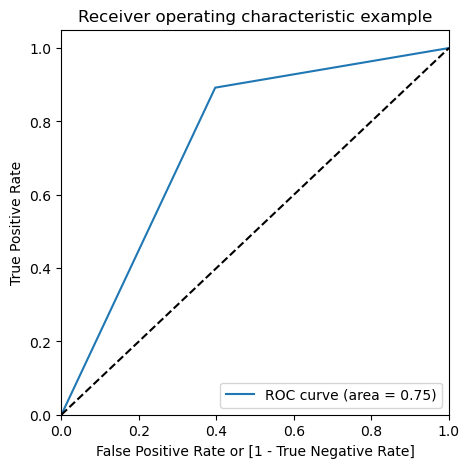

In [2990]:
draw_roc(y_pred.delayed_payment, y_pred.log_pred)

AUC of 0.75 is acceptable

In [ ]:
#lets find the optimal cutoff point

In [2992]:
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    y_pred[f'y_pred_{i}'] = y_pred['delayed_payment_pred_%'].apply(lambda x : 1 if x > i else 0)
y_pred

,delayed_payment,delayed_payment_pred_%,log_pred,y_pred_0.1,y_pred_0.2,y_pred_0.3,y_pred_0.4,y_pred_0.5,y_pred_0.6,y_pred_0.7,y_pred_0.8,y_pred_0.9
56555,0,0.228810,0,1,1,0,0,0,0,0,0,0
45072,0,0.326158,0,1,1,1,0,0,0,0,0,0
72563,0,0.211174,0,1,1,0,0,0,0,0,0,0
32369,1,0.979738,1,1,1,1,1,1,1,1,1,1
33602,1,0.980876,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
79903,1,0.712788,1,1,1,1,1,1,1,1,0,0
49816,0,0.690216,1,1,1,1,1,1,1,0,0,0
38955,1,0.642340,1,1,1,1,1,1,1,0,0,0
10812,1,0.598682,1,1,1,1,1,1,0,0,0,0


In [2994]:
# Accuracy sensitivity and specificity for various cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_pred.delayed_payment, y_pred[f'y_pred_{i}'])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.1   0.1  0.676744  1.000000  0.000190
0.2   0.2  0.698786  0.992562  0.083932
0.3   0.3  0.773500  0.928961  0.448131
0.4   0.4  0.794219  0.903394  0.565722
0.5   0.5  0.798590  0.892020  0.603047
0.6   0.6  0.795712  0.869069  0.642180
0.7   0.7  0.767066  0.784291  0.731016
0.8   0.8  0.641880  0.509690  0.918543
0.9   0.9  0.545862  0.339930  0.976863


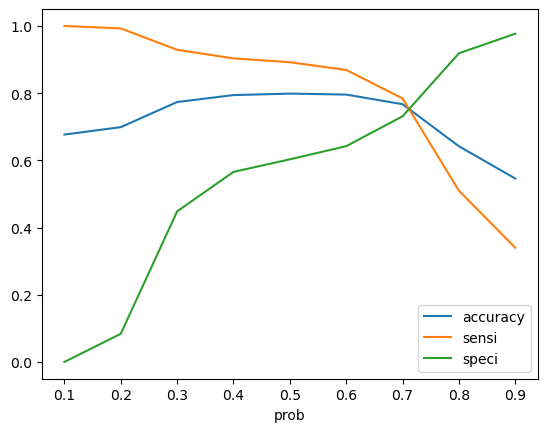

In [2996]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.7 appears to be the optimum point to take it as a cutoff probability.However lets take 0.6 as the cutoff. Since the business wants to focus on customers who are likely to default we will prioritize recall with a higher accuracy score

In [3027]:
y_pred['final_predicted'] = y_pred['delayed_payment_pred_%'].map( lambda x: 1 if x > 0.6 else 0)

y_pred.head()

,delayed_payment,delayed_payment_pred_%,log_pred,y_pred_0.1,y_pred_0.2,y_pred_0.3,y_pred_0.4,y_pred_0.5,y_pred_0.6,y_pred_0.7,y_pred_0.8,y_pred_0.9,final_predicted
56555,0,0.228810,0,1,1,0,0,0,0,0,0,0,0
45072,0,0.326158,0,1,1,1,0,0,0,0,0,0,0
72563,0,0.211174,0,1,1,0,0,0,0,0,0,0,0
32369,1,0.979738,1,1,1,1,1,1,1,1,1,1,1
33602,1,0.980876,1,1,1,1,1,1,1,1,1,1,1


In [3029]:
# Let's check the overall accuracy.
print("accuracy_score= ", accuracy_score(y_pred.delayed_payment, y_pred.final_predicted))

# Precision Score
print("precision_score= ", precision_score(y_pred.delayed_payment, y_pred.final_predicted))

# Recall Score
print("recall_score= ", recall_score(y_pred.delayed_payment, y_pred.final_predicted))

accuracy_score=  0.7957116690011852
precision_score=  0.8356152399282621
recall_score=  0.8690687411855693


In [3031]:
##Precision and recall tradeoff

y_pred.delayed_payment, y_pred.final_predicted


(56555    0
 45072    0
 72563    0
 32369    1
 33602    1
         ..
 79903    1
 49816    0
 38955    1
 10812    1
 37346    1
 Name: delayed_payment, Length: 64967, dtype: int64,
 56555    0
 45072    0
 72563    0
 32369    1
 33602    1
         ..
 79903    1
 49816    1
 38955    1
 10812    0
 37346    0
 Name: final_predicted, Length: 64967, dtype: int64)

In [3033]:
p, r, thresholds = precision_recall_curve(y_pred.delayed_payment, y_pred.final_predicted)

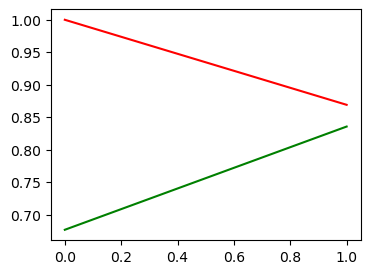

In [3035]:
plt.figure(figsize=(4,3))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [3037]:
# Applying the transformation on same columns of test set
X_test[['USD Amount', 'Time_to_payment']]= std_scaler.transform(X_test[['USD Amount', 'Time_to_payment']])
X_test.head()

,USD Amount,Time_to_payment,Payment_Term_30 Days from EOM,Payment_Term_30 Days from Inv Date,Payment_Term_45 Days from EOM,Payment_Term_45 Days from Inv Date,Payment_Term_60 Days from EOM,Payment_Term_60 Days from Inv Date,Payment_Term_90 Days from EOM,Payment_Term_Immediate,Payment_Term_Others,INVOICE_CLASS_DM,Other_Curr,SAR,USD,cluster_id
72824,-0.563219,-1.279933,0,0,0,0,0,1,0,0,0,0,0,0,0,0
26834,-0.563218,-1.262689,0,0,0,0,1,0,0,0,0,0,1,0,0,1
79236,-0.563219,-1.252014,0,0,0,0,0,0,1,0,0,0,0,1,0,0
64483,-0.563219,-1.280755,0,0,0,0,1,0,0,0,0,0,0,1,0,1
84416,-0.563218,-1.279933,0,0,0,0,0,1,0,0,0,0,0,1,0,1


In [3041]:
# X_test.drop(['INVOICE_CLASS_INV'], axis= 1, inplace = True)

In [3043]:
# Adding a constant
X_test_sm = sm.add_constant(X_test)

In [3045]:
#Making predictions on the test set
y_test_pred = result.predict(X_test_sm)
y_test_pred[:10]

72824    0.828320
26834    0.384943
79236    0.879240
64483    0.615575
84416    0.896619
15433    0.908921
35519    0.903359
20873    0.970439
14985    0.974826
66422    0.864664
dtype: float64

In [3047]:
# Converting y_pred to a dataframe which is an array
y_test_pred_1 = pd.DataFrame(y_test_pred)

In [3049]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [3051]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [3053]:
y_test_df.head()

,delayed_payment,CustID
72824,0,72824
26834,0,26834
79236,1,79236
64483,0,64483
84416,1,84416


In [3055]:
y_test_pred_1.head()

,0
72824,0.828320
26834,0.384943
79236,0.879240
64483,0.615575
84416,0.896619


In [3057]:
# Removing index for both dataframes to append them side by side
y_test_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [3059]:
# Appending both
y_pred_final = pd.concat([y_test_df, y_test_pred_1],axis=1)

In [3061]:
y_pred_final.columns = ['delayed_payment', 'CustID', 'delay_prob']

In [3063]:
y_pred_final.head()

,delayed_payment,CustID,delay_prob
0,0,72824,0.828320
1,0,26834,0.384943
2,1,79236,0.879240
3,0,64483,0.615575
4,1,84416,0.896619


In [3065]:
# Creating final prediction on test set based on 0.72 cutoff
y_pred_final['final_predicted'] = y_pred_final.delay_prob.map(lambda x: 1 if x >= 0.6 else 0)

In [3067]:
y_pred_final.head()

,delayed_payment,CustID,delay_prob,final_predicted
0,0,72824,0.828320,1
1,0,26834,0.384943,0
2,1,79236,0.879240,1
3,0,64483,0.615575,1
4,1,84416,0.896619,1


In [3069]:
# Let's check the overall accuracy.
print("Accuracy_score=", accuracy_score(y_pred_final.delayed_payment, y_pred_final.final_predicted))

#precision score
print("Precision_score=", precision_score(y_pred_final.delayed_payment, y_pred_final.final_predicted))

# Recall Score
print("Recall_score=", recall_score(y_pred.delayed_payment, y_pred.final_predicted))

Accuracy_score= 0.7768998707082315
Precision_score= 0.79754052016585
Recall_score= 0.8690687411855693


Train vs test acccuracy

In [3071]:
print("train accuracy score= ", accuracy_score(y_pred.delayed_payment, y_pred.final_predicted))
print("test accuracy score=", accuracy_score(y_pred_final.delayed_payment, y_pred_final.final_predicted))

train accuracy score=  0.7957116690011852
test accuracy score= 0.7768998707082315


**Train and test accuracy score are close enough. So our model is decent**

Let us predict this on the open invoice dataset

In [3074]:
df_open_invoice.columns

Index(['Customer_Name', 'Due Date', 'AGE', 'USD Amount', 'INV_CREATION_DATE',
       'Payment_Term_30 Days from EOM', 'Payment_Term_30 Days from Inv Date',
       'Payment_Term_45 Days from EOM', 'Payment_Term_45 Days from Inv Date',
       'Payment_Term_60 Days from EOM', 'Payment_Term_60 Days from Inv Date',
       'Payment_Term_90 Days from EOM', 'Payment_Term_Immediate',
       'Payment_Term_Others', 'Time_to_payment', 'INVOICE_CLASS_DM',
       'INVOICE_CLASS_INV', 'Other_Curr', 'SAR', 'USD'],
      dtype='object')

In [ ]:
# let is add the cluster id we did earlier to this dataset

In [3076]:
df_open_invoice_1 = pd.merge(df_open_invoice, customer_clusters, how='left', on='Customer_Name')

In [3078]:
df_open_invoice_1.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,Payment_Term_30 Days from EOM,Payment_Term_30 Days from Inv Date,Payment_Term_45 Days from EOM,Payment_Term_45 Days from Inv Date,Payment_Term_60 Days from EOM,...,Payment_Term_90 Days from EOM,Payment_Term_Immediate,Payment_Term_Others,Time_to_payment,INVOICE_CLASS_DM,INVOICE_CLASS_INV,Other_Curr,SAR,USD,cluster_id
0,AL J Corp,2022-03-03,33,2000,2022-02-01 14:09:00,0,1,0,0,0,...,0,0,0,29,0,1,0,0,1,0.0
1,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,1,0,0,0,...,0,0,0,29,0,1,0,0,1,0.0
2,AL R Corp,2022-01-19,76,2415,2022-01-05 11:49:00,0,0,0,0,0,...,0,0,1,13,0,1,0,0,0,0.0
3,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,1,0,0,0,0,...,0,0,0,57,0,1,0,0,0,0.0
4,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,1,0,0,0,0,...,0,0,0,57,0,1,0,0,0,0.0


In [ ]:
#Filter only records where age is negative

In [3080]:
df_open_invoice_1_age = df_open_invoice_1[df_open_invoice_1['AGE'] < 0]
df_open_invoice_1_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,Payment_Term_30 Days from EOM,Payment_Term_30 Days from Inv Date,Payment_Term_45 Days from EOM,Payment_Term_45 Days from Inv Date,Payment_Term_60 Days from EOM,...,Payment_Term_90 Days from EOM,Payment_Term_Immediate,Payment_Term_Others,Time_to_payment,INVOICE_CLASS_DM,INVOICE_CLASS_INV,Other_Curr,SAR,USD,cluster_id
1,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,1,0,0,0,...,0,0,0,29,0,1,0,0,1,0.0
3,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,1,0,0,0,0,...,0,0,0,57,0,1,0,0,0,0.0
4,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,1,0,0,0,0,...,0,0,0,57,0,1,0,0,0,0.0
5,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,1,0,0,0,0,...,0,0,0,45,0,1,0,0,0,0.0
6,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,1,0,0,0,0,...,0,0,0,45,0,1,0,0,0,0.0


In [3082]:
#lets check the data for null
df_open_invoice_1_age.isna().sum()
# 768 records where cluster id is null. representinf 3 % of data

Customer_Name                           0
Due Date                                0
AGE                                     0
USD Amount                              0
INV_CREATION_DATE                       0
Payment_Term_30 Days from EOM           0
Payment_Term_30 Days from Inv Date      0
Payment_Term_45 Days from EOM           0
Payment_Term_45 Days from Inv Date      0
Payment_Term_60 Days from EOM           0
Payment_Term_60 Days from Inv Date      0
Payment_Term_90 Days from EOM           0
Payment_Term_Immediate                  0
Payment_Term_Others                     0
Time_to_payment                         0
INVOICE_CLASS_DM                        0
INVOICE_CLASS_INV                       0
Other_Curr                              0
SAR                                     0
USD                                     0
cluster_id                            768
dtype: int64

In [3084]:
round(df_open_invoice_1_age.isna().sum()/len(df_open_invoice_1_age.index), 2)

Customer_Name                         0.00
Due Date                              0.00
AGE                                   0.00
USD Amount                            0.00
INV_CREATION_DATE                     0.00
Payment_Term_30 Days from EOM         0.00
Payment_Term_30 Days from Inv Date    0.00
Payment_Term_45 Days from EOM         0.00
Payment_Term_45 Days from Inv Date    0.00
Payment_Term_60 Days from EOM         0.00
Payment_Term_60 Days from Inv Date    0.00
Payment_Term_90 Days from EOM         0.00
Payment_Term_Immediate                0.00
Payment_Term_Others                   0.00
Time_to_payment                       0.00
INVOICE_CLASS_DM                      0.00
INVOICE_CLASS_INV                     0.00
Other_Curr                            0.00
SAR                                   0.00
USD                                   0.00
cluster_id                            0.03
dtype: float64

**this means than 3% of customers do not have data in the recieved payment dataset. 
 We will remove them as they dont have previous payment history as this is important to predict their future payment delay**

In [3086]:
# Dropping the rows containing null values
df_open_invoice_1_age.dropna(axis=0, inplace=True)

In [3088]:
df_open_invoice_1_age.shape

(27247, 21)

In [3090]:
df_open_invoice_1_age.head()

#we will drop the variable not needed

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,Payment_Term_30 Days from EOM,Payment_Term_30 Days from Inv Date,Payment_Term_45 Days from EOM,Payment_Term_45 Days from Inv Date,Payment_Term_60 Days from EOM,...,Payment_Term_90 Days from EOM,Payment_Term_Immediate,Payment_Term_Others,Time_to_payment,INVOICE_CLASS_DM,INVOICE_CLASS_INV,Other_Curr,SAR,USD,cluster_id
1,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,1,0,0,0,...,0,0,0,29,0,1,0,0,1,0.0
3,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,1,0,0,0,0,...,0,0,0,57,0,1,0,0,0,0.0
4,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,1,0,0,0,0,...,0,0,0,57,0,1,0,0,0,0.0
5,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,1,0,0,0,0,...,0,0,0,45,0,1,0,0,0,0.0
6,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,1,0,0,0,0,...,0,0,0,45,0,1,0,0,0,0.0


In [3092]:
df_open_invoice_1_age.drop(['Customer_Name', 'Due Date', 'AGE', 'INV_CREATION_DATE', 'INVOICE_CLASS_INV'], axis = 1, inplace = True)

In [3094]:
df_open_invoice_1_age.columns

Index(['USD Amount', 'Payment_Term_30 Days from EOM',
       'Payment_Term_30 Days from Inv Date', 'Payment_Term_45 Days from EOM',
       'Payment_Term_45 Days from Inv Date', 'Payment_Term_60 Days from EOM',
       'Payment_Term_60 Days from Inv Date', 'Payment_Term_90 Days from EOM',
       'Payment_Term_Immediate', 'Payment_Term_Others', 'Time_to_payment',
       'INVOICE_CLASS_DM', 'Other_Curr', 'SAR', 'USD', 'cluster_id'],
      dtype='object')

## Prediction on open invoice dataset

In [3096]:
#transform USD amount and payment time
df_open_invoice_1_age[['USD Amount', 'Time_to_payment']] = std_scaler.transform(df_open_invoice_1_age[['USD Amount', 'Time_to_payment']])

In [3098]:
#add constant
df_open_invoice_1_age_sm = sm.add_constant(df_open_invoice_1_age)

In [3100]:
#predict
y_open_invoices= result.predict(df_open_invoice_1_age_sm)
y_open_invoices

1        0.570392
3        0.867586
4        0.867633
5        0.941904
6        0.941779
           ...   
79496    0.213514
79502    0.260952
79503    0.263526
79504    0.263695
79505    0.259908
Length: 27247, dtype: float64

In [3102]:
# Adding the predicted values to the dataframe
df_open_invoice_1['Pred'] = y_open_invoices
df_open_invoice_1.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,Payment_Term_30 Days from EOM,Payment_Term_30 Days from Inv Date,Payment_Term_45 Days from EOM,Payment_Term_45 Days from Inv Date,Payment_Term_60 Days from EOM,...,Payment_Term_Immediate,Payment_Term_Others,Time_to_payment,INVOICE_CLASS_DM,INVOICE_CLASS_INV,Other_Curr,SAR,USD,cluster_id,Pred
0,AL J Corp,2022-03-03,33,2000,2022-02-01 14:09:00,0,1,0,0,0,...,0,0,29,0,1,0,0,1,0.0,NaN
1,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,1,0,0,0,...,0,0,29,0,1,0,0,1,0.0,0.570392
2,AL R Corp,2022-01-19,76,2415,2022-01-05 11:49:00,0,0,0,0,0,...,0,1,13,0,1,0,0,0,0.0,NaN
3,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,1,0,0,0,0,...,0,0,57,0,1,0,0,0,0.0,0.867586
4,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,1,0,0,0,0,...,0,0,57,0,1,0,0,0,0.0,0.867633


In [3104]:
##probability of late payment aggregated at a customer level.

customer_late_prob= pd.DataFrame(df_open_invoice_1.groupby('Customer_Name')['Pred'].max().round(2))
customer_late_prob

,Pred
Customer_Name,
2H F Corp,NaN
3D D Corp,0.98
6TH Corp,0.16
A3 D Corp,NaN
ABDU Corp,0.99
...,...
ZINA Corp,NaN
ZUHA Corp,NaN
ZV F Corp,NaN


In [3106]:
# Taking 0.72 as cut off value
df_open_invoice_1['Final_Prediction'] = df_open_invoice_1.Pred.map(lambda x: 1 if x >0.6 else 0)

In [3108]:
# Final data

df_open_invoice_2 = df_open_invoice_1[df_open_invoice_1['AGE'] < 0]

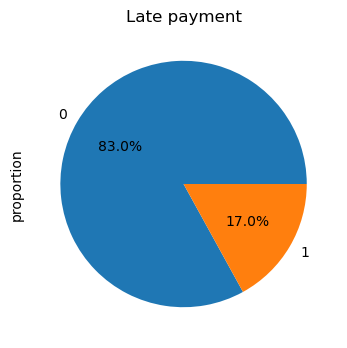

In [3110]:
plt.figure(figsize=(5,4))
df_open_invoice_2.Final_Prediction.value_counts(normalize = True).plot.pie(autopct='%1.1f%%')
plt.title("Late payment")
plt.show()

In [ ]:
# we see that from the open invoices, ~15% of the customers are likely to delay payments

In [3118]:
# Checking Customers with our target variable_delayed
Delay_in_payment = df_open_invoice_2.groupby(['Customer_Name'])['Final_Prediction'].sum()
Delay_in_payment = Delay_in_payment.to_frame()
Delay_in_payment = Delay_in_payment.sort_values(by ='Final_Prediction',ascending=False)
Delay_in_payment

,Final_Prediction
Customer_Name,
FITR Corp,1027
ALLI Corp,569
SEPH Corp,532
RADW Corp,195
CGR Corp,172
...,...
HAVE Corp,0
HATT Corp,0
HARV Corp,0


In [3114]:
# Checking Customers for total invoice counts
Total_invoice = df_open_invoice_2.groupby(['Customer_Name'])['Final_Prediction'].count() # total payments by each customers
Total_invoice = Total_invoice.to_frame()
Total_invoice = Total_invoice.sort_values(by ='Final_Prediction',ascending=False)
Total_invoice

,Final_Prediction
Customer_Name,
SEPH Corp,8260
FITR Corp,3454
PARF Corp,1717
AREE Corp,1117
ALLI Corp,1042
...,...
DR M Corp,1
DUSI Corp,1
SAIN Corp,1


In [3146]:
# Merging both dataframes based on Customer_name
Final_df=pd.merge(Delay_in_payment,Total_invoice,how='inner',on='Customer_Name')

In [3148]:
# Renaming the columns
Final_df.columns=["Delay_in_payment","Total_Invoice"]

In [3150]:
# Creating a column for delay percentage of each customers
Final_df['Delay%']=np.round(Final_df['Delay_in_payment']/Final_df['Total_Invoice']*100,2)

In [3152]:
# Checking Merge_df
Final_df.sort_values(['Delay%', 'Total_Invoice','Delay_in_payment'], ascending=False)

,Delay_in_payment,Total_Invoice,Delay%
Customer_Name,,,
MCT Corp,75,75,100.0
SOGE Corp,45,45,100.0
3D D Corp,30,30,100.0
GOLD Corp,14,14,100.0
BURB Corp,5,5,100.0
...,...,...,...
INK Corp,0,1,0.0
IRAQ Corp,0,1,0.0
HOYU Corp,0,1,0.0


In [3156]:
#top 25 Customer likley to delay payment

Final_df.sort_values(['Delay%', 'Total_Invoice','Delay_in_payment'], ascending=False).head(25)

,Delay_in_payment,Total_Invoice,Delay%
Customer_Name,,,
MCT Corp,75,75,100.0
SOGE Corp,45,45,100.0
3D D Corp,30,30,100.0
GOLD Corp,14,14,100.0
BURB Corp,5,5,100.0
CARO Corp,4,4,100.0
FINA Corp,4,4,100.0
ST R Corp,3,3,100.0
JOUD Corp,3,3,100.0


**Now let us try Random forest**

In [3158]:
df_received_1.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CURRENCY_CODE', 'USD Amount', 'INVOICE_CREATION_DATE', 'DUE_DATE',
       'PAYMENT_TERM', 'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'delayed_payment', 'Time_to_payment',
       'payment_made_time', '30 Days from EOM', '30 Days from Inv Date',
       '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
       '60 Days from Inv Date', '90 Days from EOM', 'Immediate', 'Others'],
      dtype='object')

In [3160]:
df_received_cluster.columns

Index(['USD Amount', 'delayed_payment', 'Time_to_payment',
       'Payment_Term_30 Days from EOM', 'Payment_Term_30 Days from Inv Date',
       'Payment_Term_45 Days from EOM', 'Payment_Term_45 Days from Inv Date',
       'Payment_Term_60 Days from EOM', 'Payment_Term_60 Days from Inv Date',
       'Payment_Term_90 Days from EOM', 'Payment_Term_Immediate',
       'Payment_Term_Others', 'INVOICE_CLASS_DM', 'INVOICE_CLASS_INV',
       'Other_Curr', 'SAR', 'USD', 'cluster_id'],
      dtype='object')

In [3162]:
# creating X and y
X= df_received_cluster.drop(['delayed_payment'], axis = 1)
y= df_received_cluster['delayed_payment']

In [3164]:
# Splitting into train and test set
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.3, random_state=100)

In [3166]:
#import random forest
from sklearn.ensemble import RandomForestClassifier

In [3332]:
# Building a base random forest model to check the accuracy
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [3334]:
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [3172]:
rf.estimators_[4]

DecisionTreeClassifier(max_depth=4, max_features=5, random_state=1823289175)

In [3174]:
sample_tree = rf.estimators_[4]

In [3176]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus
# import graphviz

In [3178]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Delay', "No Delay"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

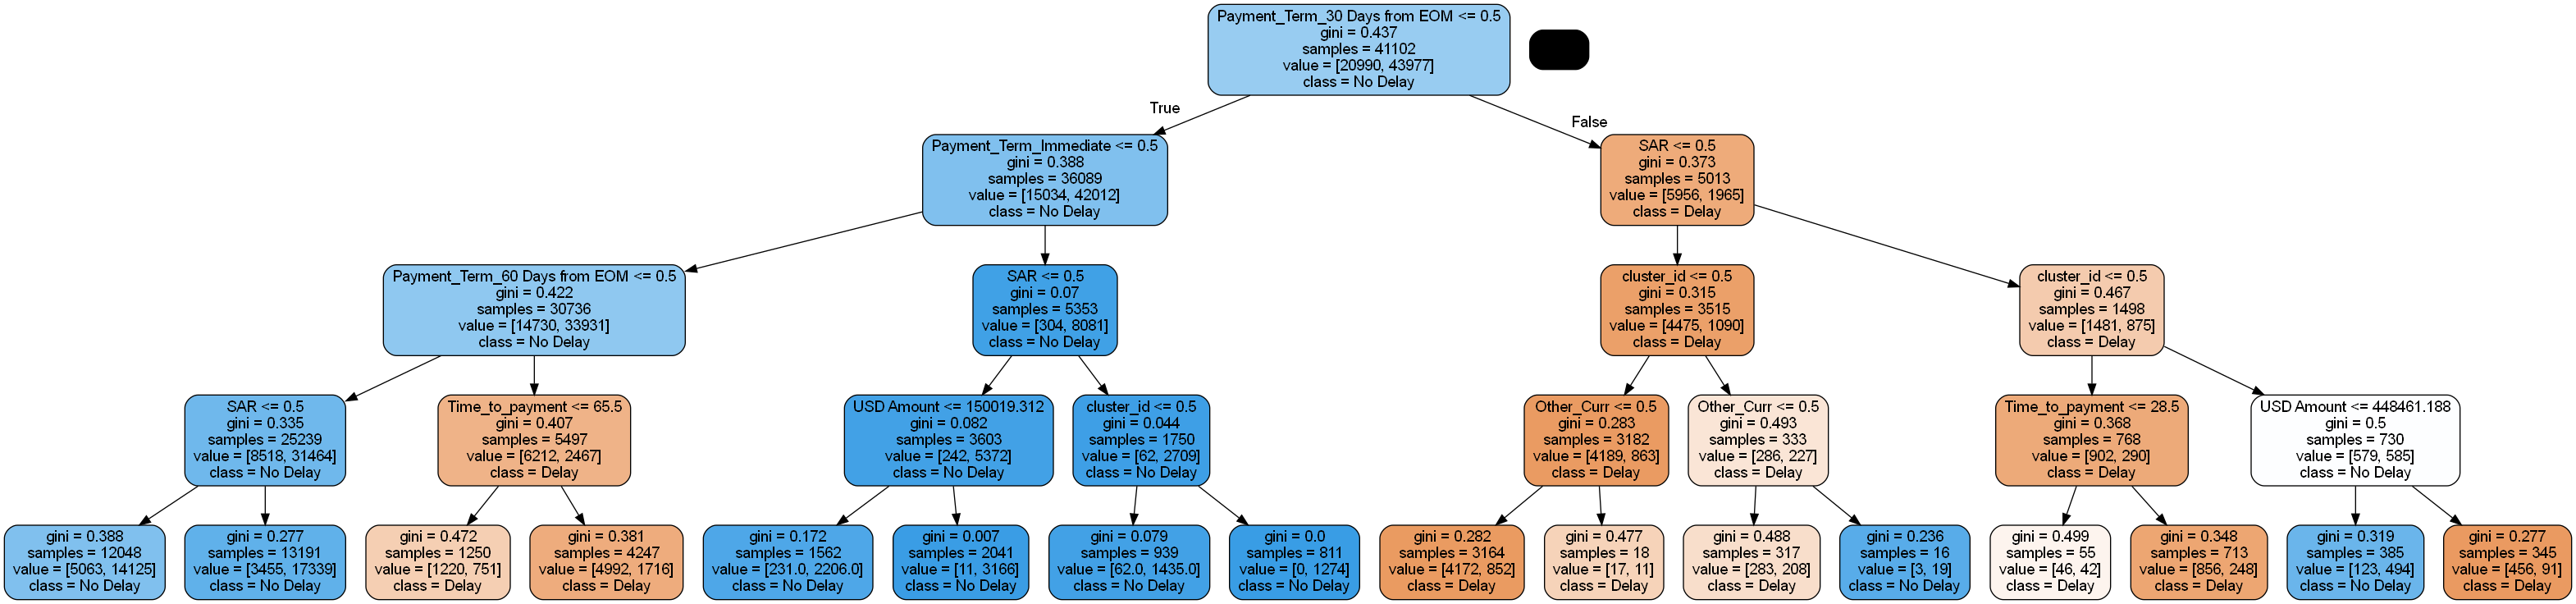

In [3184]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png(), width=1000, height=1000)

In [ ]:
##Creating helper functions to evaluate model performance

In [3186]:
def evaluate_model(rf_classifier):
    print("Train Accuracy :", accuracy_score(y_train_rf, rf_classifier.predict(X_train_rf)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train_rf, rf_classifier.predict(X_train_rf)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test_rf, rf_classifier.predict(X_test_rf)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test_rf, rf_classifier.predict(X_test_rf)))

In [3188]:
evaluate_model(rf)

Train Accuracy : 0.810242122923946
Train Confusion Matrix:
[[12068  8958]
 [ 3370 40571]]
--------------------------------------------------
Test Accuracy : 0.80792989513001
Test Confusion Matrix:
[[ 5104  3877]
 [ 1471 17392]]


In [3190]:
rf.oob_score_

0.7976357227515508

In [2214]:
# from sklearn.metrics import plot_roc_curve
# plot_roc_curve(rf, X_train_rf, y_train_rf)
# plt.show()

In [3192]:
from sklearn.metrics import RocCurveDisplay

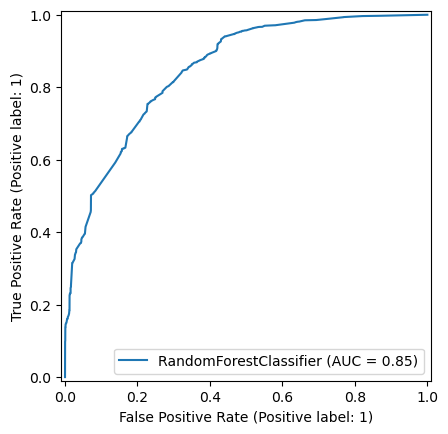

In [3338]:
RocCurveDisplay.from_estimator(rf, X_train_rf, y_train_rf)
plt.show()

In [3196]:
clf = rf.fit(X_test_rf, y_test_rf)

In [3198]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, clf.predict_proba(X)[:, 1])

0.8432173168680445

In [3200]:
rf.feature_importances_

array([0.10939739, 0.14445515, 0.29104029, 0.02205698, 0.00139601,
       0.        , 0.25181095, 0.01296885, 0.00083906, 0.09569651,
       0.00276009, 0.        , 0.00060307, 0.00278107, 0.01186013,
       0.00249715, 0.04983731])

In [3202]:
imp_df = pd.DataFrame({
    "Varname": X_train_rf.columns,
    "Imp": rf.feature_importances_
})

In [3204]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
2,Payment_Term_30 Days from EOM,0.291040
6,Payment_Term_60 Days from EOM,0.251811
1,Time_to_payment,0.144455
0,USD Amount,0.109397
9,Payment_Term_Immediate,0.095697
16,cluster_id,0.049837
3,Payment_Term_30 Days from Inv Date,0.022057
7,Payment_Term_60 Days from Inv Date,0.012969
14,SAR,0.011860
13,Other_Curr,0.002781


In [3206]:
# Using cross validation to check if our model is overfitting

from sklearn.model_selection import cross_val_score 

rf_cv = RandomForestClassifier(random_state=100)

# Compute cross-validation scores on the training data
scores = cross_val_score(rf_cv, X_train_rf, y_train_rf, cv=5, scoring= 'recall')

# Compute the mean and standard deviation of the cross-validation scores
mean_score = scores.mean()
std_score = scores.std()

# Print the score, mean and standard deviation of the cross-validation scores
print("Score:", scores)
print("Mean score:", mean_score)
print("Standard deviation:", std_score)

Score: [0.93969049 0.93298441 0.94173873 0.94128357 0.93456987]
Mean score: 0.9380534141007661
Standard deviation: 0.003592363150618558


In [3208]:
# Checking accuracy and classification report
from sklearn.metrics import classification_report

y_train_pred_rf = rf.predict(X_train_rf)
accuracy = accuracy_score(y_train_rf, y_train_pred_rf)
print(classification_report(y_train_rf, y_train_pred_rf))
print("Accuracy is : ", accuracy)

              precision    recall  f1-score   support

           0       0.81      0.56      0.66     21026
           1       0.82      0.94      0.87     43941

    accuracy                           0.81     64967
   macro avg       0.81      0.75      0.77     64967
weighted avg       0.81      0.81      0.80     64967

Accuracy is :  0.8140132682746625


In [3210]:
# Creating y_pred for test data
y_test_pred_rf = rf.predict(X_test_rf)

In [3212]:
# Checking accuracy and classification report of test data
accuracy = accuracy_score(y_test_rf, y_test_pred_rf)
print(classification_report(y_test_rf, y_test_pred_rf))
print("Accuracy is : ", accuracy)

              precision    recall  f1-score   support

           0       0.81      0.55      0.66      8981
           1       0.81      0.94      0.87     18863

    accuracy                           0.81     27844
   macro avg       0.81      0.74      0.76     27844
weighted avg       0.81      0.81      0.80     27844

Accuracy is :  0.8127424220657952


Hyperparameter Tuning

In [3219]:
#Using randomized search for hyper-parameter tuning

# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist = {
    'n_estimators': randint(30, 200),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}
    
rf = RandomForestClassifier(random_state=100)

random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=1, random_state=100)

random_search.fit(X_train_rf, y_train_rf)

# Best Hyperparameters
print("Best hyperparameters:", random_search.best_params_)
print("Best f1 score:", random_search.best_score_)

best_rf = random_search.best_estimator_
y_pred_cv_rf = best_rf.predict(X_train_rf)

print(classification_report(y_train_rf, y_pred_cv_rf))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best hyperparameters: {'max_depth': 17, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 188}
Best f1 score: 0.8745054620938726
              precision    recall  f1-score   support

           0       0.91      0.75      0.82     21026
           1       0.89      0.96      0.93     43941

    accuracy                           0.90     64967
   macro avg       0.90      0.86      0.88     64967
weighted avg       0.90      0.90      0.89     64967



In [3221]:
# Test set

y_pred_test_cv = best_rf.predict(X_test_rf)

print(classification_report(y_test_rf,y_pred_test_cv))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      8981
           1       0.88      0.95      0.91     18863

    accuracy                           0.88     27844
   macro avg       0.88      0.84      0.86     27844
weighted avg       0.88      0.88      0.88     27844



In [3346]:
from sklearn.metrics import f1_score

f1_train = f1_score(y_train_rf, y_pred_cv_rf, average='binary') 
f1_test = f1_score(y_test_rf, y_pred_test_cv, average='binary') 


In [3348]:
f1_train, f1_test

(0.9264321849630139, 0.9149781081356277)

In [3365]:
#Compare the train and test scores

In [3361]:
print("Train Accuracy_score=", accuracy_score(y_train_rf, y_pred_cv_rf))
print("Test Accuracy_score=", accuracy_score(y_test_rf, y_pred_test_cv))

#precision score
print("Train Precision_score=", precision_score(y_train_rf, y_pred_cv_rf))
print("Test Precision_score=", precision_score(y_test_rf, y_pred_test_cv))

# Recall Score
print("Train Recall_score=", recall_score(y_train_rf, y_pred_cv_rf))
print("Test Recall_score=", recall_score(y_test_rf, y_pred_test_cv))


Train Accuracy_score= 0.896362768790309
Test Accuracy_score= 0.8800459704065507
Train Precision_score= 0.891004623791509
Test Precision_score= 0.8800744331815288
Train Recall_score= 0.9647937006440455
Test Recall_score= 0.9527646715792822


In [ ]:
Precision


In [ ]:
Recall


### F1-score for train and test set is 0.92 and 0.91 respectively. lets use this as final model 

In [3223]:
important_features = best_rf.feature_importances_
important_features

array([0.2999989 , 0.19431685, 0.15662633, 0.01082283, 0.01007034,
       0.0032947 , 0.12245179, 0.01470777, 0.00364172, 0.0295918 ,
       0.00777395, 0.00107944, 0.00711931, 0.01166128, 0.03522561,
       0.01998093, 0.07163644])

In [3225]:
important_sorted = important_features.argsort()[::-1]

# Print the feature ranking
print("Features by importance:")
for i, idx in enumerate(important_sorted):
    print(f"{i+1}. {X.columns[idx]} ({important_features[idx]:.3f})")

Features by importance:
1. USD Amount (0.300)
2. Time_to_payment (0.194)
3. Payment_Term_30 Days from EOM (0.157)
4. Payment_Term_60 Days from EOM (0.122)
5. cluster_id (0.072)
6. SAR (0.035)
7. Payment_Term_Immediate (0.030)
8. USD (0.020)
9. Payment_Term_60 Days from Inv Date (0.015)
10. Other_Curr (0.012)
11. Payment_Term_30 Days from Inv Date (0.011)
12. Payment_Term_45 Days from EOM (0.010)
13. Payment_Term_Others (0.008)
14. INVOICE_CLASS_INV (0.007)
15. Payment_Term_90 Days from EOM (0.004)
16. Payment_Term_45 Days from Inv Date (0.003)
17. INVOICE_CLASS_DM (0.001)


#### let us apply random forest model on open invoice data

In [3227]:
df_open_invoice.columns

Index(['Customer_Name', 'Due Date', 'AGE', 'USD Amount', 'INV_CREATION_DATE',
       'Payment_Term_30 Days from EOM', 'Payment_Term_30 Days from Inv Date',
       'Payment_Term_45 Days from EOM', 'Payment_Term_45 Days from Inv Date',
       'Payment_Term_60 Days from EOM', 'Payment_Term_60 Days from Inv Date',
       'Payment_Term_90 Days from EOM', 'Payment_Term_Immediate',
       'Payment_Term_Others', 'Time_to_payment', 'INVOICE_CLASS_DM',
       'INVOICE_CLASS_INV', 'Other_Curr', 'SAR', 'USD'],
      dtype='object')

In [3229]:
#filter recored where age is -ve
df_open_invoice_age_rf = df_open_invoice[df_open_invoice['AGE'] < 0 ]

In [3231]:
df_open_invoice_age_rf.shape

(28015, 20)

In [3233]:
df_open_invoice_age_rf.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,Payment_Term_30 Days from EOM,Payment_Term_30 Days from Inv Date,Payment_Term_45 Days from EOM,Payment_Term_45 Days from Inv Date,Payment_Term_60 Days from EOM,Payment_Term_60 Days from Inv Date,Payment_Term_90 Days from EOM,Payment_Term_Immediate,Payment_Term_Others,Time_to_payment,INVOICE_CLASS_DM,INVOICE_CLASS_INV,Other_Curr,SAR,USD
2,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,1,0,0,0,0,0,0,0,29,0,1,0,0,1
4,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,1,0,0,0,0,0,0,0,0,57,0,1,0,0,0
5,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,1,0,0,0,0,0,0,0,0,57,0,1,0,0,0
6,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,1,0,0,0,0,0,0,0,0,45,0,1,0,0,0
7,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,1,0,0,0,0,0,0,0,0,45,0,1,0,0,0


In [3235]:
#add cluster id 
df_open_invoice_age_cluster_rf = pd.merge(df_open_invoice_age_rf, customer_clusters, how='left', on='Customer_Name')

In [3237]:
#null value to be removed 
df_open_invoice_age_cluster_rf.dropna(axis=0, inplace=True)

In [3239]:
df_open_invoice_age_cluster_rf.shape

(27247, 21)

In [3241]:
df_open_invoice_age_cluster_rf.columns

Index(['Customer_Name', 'Due Date', 'AGE', 'USD Amount', 'INV_CREATION_DATE',
       'Payment_Term_30 Days from EOM', 'Payment_Term_30 Days from Inv Date',
       'Payment_Term_45 Days from EOM', 'Payment_Term_45 Days from Inv Date',
       'Payment_Term_60 Days from EOM', 'Payment_Term_60 Days from Inv Date',
       'Payment_Term_90 Days from EOM', 'Payment_Term_Immediate',
       'Payment_Term_Others', 'Time_to_payment', 'INVOICE_CLASS_DM',
       'INVOICE_CLASS_INV', 'Other_Curr', 'SAR', 'USD', 'cluster_id'],
      dtype='object')

In [3243]:
##dropping columns
df_open_invoice_age_cluster_rf_1 = df_open_invoice_age_cluster_rf.drop(['Customer_Name', 'Due Date', 'INV_CREATION_DATE', 'AGE'], axis=1)

In [3245]:
df_open_invoice_age_cluster_rf_1.shape

(27247, 17)

In [3247]:
X_train_rf.columns

Index(['USD Amount', 'Time_to_payment', 'Payment_Term_30 Days from EOM',
       'Payment_Term_30 Days from Inv Date', 'Payment_Term_45 Days from EOM',
       'Payment_Term_45 Days from Inv Date', 'Payment_Term_60 Days from EOM',
       'Payment_Term_60 Days from Inv Date', 'Payment_Term_90 Days from EOM',
       'Payment_Term_Immediate', 'Payment_Term_Others', 'INVOICE_CLASS_DM',
       'INVOICE_CLASS_INV', 'Other_Curr', 'SAR', 'USD', 'cluster_id'],
      dtype='object')

In [3249]:
df_open_invoice_age_cluster_rf_1.columns

Index(['USD Amount', 'Payment_Term_30 Days from EOM',
       'Payment_Term_30 Days from Inv Date', 'Payment_Term_45 Days from EOM',
       'Payment_Term_45 Days from Inv Date', 'Payment_Term_60 Days from EOM',
       'Payment_Term_60 Days from Inv Date', 'Payment_Term_90 Days from EOM',
       'Payment_Term_Immediate', 'Payment_Term_Others', 'Time_to_payment',
       'INVOICE_CLASS_DM', 'INVOICE_CLASS_INV', 'Other_Curr', 'SAR', 'USD',
       'cluster_id'],
      dtype='object')

In [ ]:
#rearraging column to be in the same order as it was during fitting

In [3251]:
new_order = ['USD Amount', 'Time_to_payment', 'Payment_Term_30 Days from EOM',
       'Payment_Term_30 Days from Inv Date', 'Payment_Term_45 Days from EOM',
       'Payment_Term_45 Days from Inv Date', 'Payment_Term_60 Days from EOM',
       'Payment_Term_60 Days from Inv Date', 'Payment_Term_90 Days from EOM',
       'Payment_Term_Immediate', 'Payment_Term_Others', 'INVOICE_CLASS_DM',
       'INVOICE_CLASS_INV', 'Other_Curr', 'SAR', 'USD', 'cluster_id']

In [3253]:
df_open_invoice_age_cluster_rf_1 = df_open_invoice_age_cluster_rf_1[new_order]

In [3255]:
##prediction

y_open_invoices= best_rf.predict(df_open_invoice_age_cluster_rf_1)
y_open_invoices


array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [3257]:
#add the precited value to the dataset

df_open_invoice_age_cluster_rf['Pred_rf'] = y_open_invoices
df_open_invoice_age_cluster_rf.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,Payment_Term_30 Days from EOM,Payment_Term_30 Days from Inv Date,Payment_Term_45 Days from EOM,Payment_Term_45 Days from Inv Date,Payment_Term_60 Days from EOM,...,Payment_Term_Immediate,Payment_Term_Others,Time_to_payment,INVOICE_CLASS_DM,INVOICE_CLASS_INV,Other_Curr,SAR,USD,cluster_id,Pred_rf
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,1,0,0,0,...,0,0,29,0,1,0,0,1,0.0,1
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,1,0,0,0,0,...,0,0,57,0,1,0,0,0,0.0,1
2,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,1,0,0,0,0,...,0,0,57,0,1,0,0,0,0.0,0
3,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,1,0,0,0,0,...,0,0,45,0,1,0,0,0,0.0,0
4,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,1,0,0,0,0,...,0,0,45,0,1,0,0,0,0.0,0


In [3259]:
# Customer-wise model prediction
customer_delay_prob= pd.DataFrame(df_open_invoice_age_cluster_rf.groupby('Customer_Name')['Pred_rf'].max().round(2))
customer_delay_prob

,Pred_rf
Customer_Name,
3D D Corp,1
6TH Corp,1
ABDU Corp,1
ABEE Corp,0
ABU Corp,1
...,...
XPRE Corp,1
YOUG Corp,1
YOUS Corp,1


In [3261]:
df_open_invoice_age_cluster_rf.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,Payment_Term_30 Days from EOM,Payment_Term_30 Days from Inv Date,Payment_Term_45 Days from EOM,Payment_Term_45 Days from Inv Date,Payment_Term_60 Days from EOM,...,Payment_Term_Immediate,Payment_Term_Others,Time_to_payment,INVOICE_CLASS_DM,INVOICE_CLASS_INV,Other_Curr,SAR,USD,cluster_id,Pred_rf
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,1,0,0,0,...,0,0,29,0,1,0,0,1,0.0,1
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,1,0,0,0,0,...,0,0,57,0,1,0,0,0,0.0,1
2,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,1,0,0,0,0,...,0,0,57,0,1,0,0,0,0.0,0
3,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,1,0,0,0,0,...,0,0,45,0,1,0,0,0,0.0,0
4,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,1,0,0,0,0,...,0,0,45,0,1,0,0,0,0.0,0


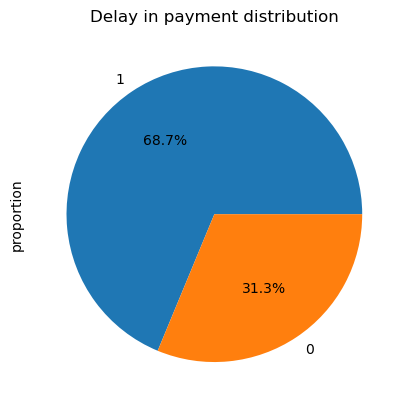

In [3265]:
(df_open_invoice_age_cluster_rf.Pred_rf.value_counts(normalize = True)*100).plot.pie(autopct='%1.1f%%')
plt.title("Delay in payment distribution")
plt.show()

In [3269]:
# Checking Customers with our target variable_delayed
Delay_payment = df_open_invoice_age_cluster_rf.groupby(['Customer_Name'])['Pred_rf'].sum()
Delay_payment = Delay_payment.to_frame()
Delay_payment = Delay_payment.sort_values(by ='Pred_rf',ascending=False)
Delay_payment.columns = ['Delay_payment']

In [3271]:
# Checking Customers for total invoice counts
total_invoices = df_open_invoice_age_cluster_rf.groupby(['Customer_Name'])['Pred_rf'].count() 
total_invoices = total_invoices.to_frame()
total_invoices = total_invoices.sort_values(by ='Pred_rf',ascending=False)
total_invoices.columns = ['Total_invoices']

In [3273]:
# Merging both dataframes based on Customer_name
Merge_df=pd.merge(Delay_payment,total_invoices,how='inner',on='Customer_Name')

Merge_df

,Delay_payment,Total_invoices
Customer_Name,,
SEPH Corp,6597,8260
FITR Corp,2495,3454
PARF Corp,1158,1717
ALLI Corp,480,1042
AREE Corp,480,1117
...,...,...
BACC Corp,0,36
ARTV Corp,0,2
ARMA Corp,0,1


In [3275]:
# Creating a column for delay percentage of each customers
Merge_df['Delay%']=np.round(Merge_df['Delay_payment']/Merge_df['Total_invoices']*100,2)

In [3277]:
# Checking Merge_df
Merge_df.sort_values(['Delay%', 'Total_invoices', 'Delay_payment'],ascending=False)

,Delay_payment,Total_invoices,Delay%
Customer_Name,,,
XPRE Corp,107,107,100.0
TAMI Corp,98,98,100.0
PARI Corp,67,67,100.0
AL N Corp,66,66,100.0
FEND Corp,40,40,100.0
...,...,...,...
SHIF Corp,0,1,0.0
COMP Corp,0,1,0.0
ARMA Corp,0,1,0.0


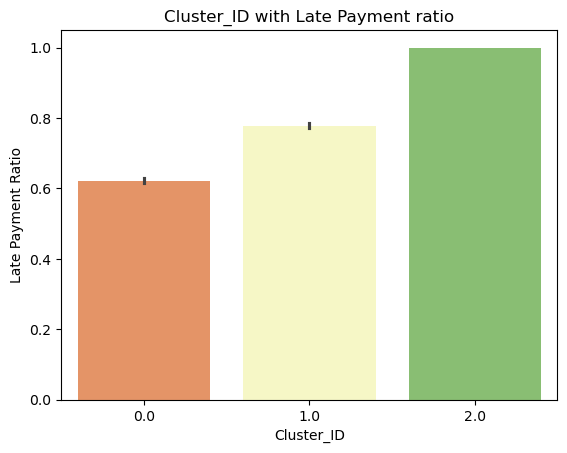

In [3281]:
sns.barplot(data=df_open_invoice_age_cluster_rf, x='cluster_id', y='Pred_rf', estimator=np.mean, palette='RdYlGn')
plt.title("Cluster_ID with Late Payment ratio")
plt.xlabel("Cluster_ID")
plt.ylabel("Late Payment Ratio")
plt.show()
#cluster ID 2 has significantly higher probability ratio of default than clusters 0 and 1

In [3283]:
Merge_df.sort_values(['Delay%','Total_invoices','Delay_payment'],ascending=[False,False,False]).head(25) # top 25 customers with highest delay rates

,Delay_payment,Total_invoices,Delay%
Customer_Name,,,
XPRE Corp,107,107,100.0
TAMI Corp,98,98,100.0
PARI Corp,67,67,100.0
AL N Corp,66,66,100.0
FEND Corp,40,40,100.0
AL D Corp,32,32,100.0
HUSS Corp,30,30,100.0
CLAD Corp,29,29,100.0
MOHD Corp,29,29,100.0
